In [ ]:
# N A R A N E 'S 👋  C O D E   S N I P P E T S '
# Project: Scanner Source Identification

In [40]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io,img_as_float
from skimage.filters import sobel
from scipy.stats import skew, kurtosis,entropy
import matplotlib.pyplot as plt 

In [ ]:
def load_gray(img_path,size=(512,512)):
    img=io.imread(img_path, as_gray=True)
    img=img_as_float(img)
    return cv2.resize(img,size, interpolation=cv2.INTER_AREA)

In [ ]:
def extract_features(img,file_path,scanner_id="unknown"):
    h,w=img.shape
    aspect_ratio=w/h
    file_size_kb=os.path.getsize(file_path)/1024  # in KB
    pixels=img.flatten()
    mean_intensity=np.mean(pixels)
    std_intensity=np.std(pixels)
    skewness=skew(pixels)
    kurt=kurtosis(pixels)
    ent=entropy(np.histogram(pixels, bins=256, range=(0, 1))[0]+1e-6)
    edges=sobel(img)
    edge_density=np.mean(edges>0.1)
    return {
        "file_name": os.path.basename(file_path),
        "class_label": scanner_id,
        "width": w,
        "height": h,
        "aspect_ratio": aspect_ratio,
        "file_size_kb": file_size_kb,
        "mean_intensity": mean_intensity,
        "std_intensity": std_intensity,
        "skewness": skewness,
        "kurtosis": kurt,
        "entropy": ent,
        "edge_density": edge_density
    }


In [ ]:
columns = [
    "file_name","class_label","width", "height", "aspect_ratio", "file_size_kb",
    "mean_intensity", "std_intensity", "skewness", "kurtosis",
    "entropy", "edge_density"
]

In [ ]:
metadata = pd.DataFrame(columns=columns)

In [ ]:
def process_image_and_add(df,img_path,scanner_id="unknown"):
    img=load_gray(img_path)
    features=extract_features(img,img_path,scanner_id)
    return pd.concat([df, pd.DataFrame([features])], ignore_index=True)

def process_image_and_append(df, img_path, scanner_id="unknown"):
    img = load_gray(img_path)
    features = extract_features(img, img_path, scanner_id)
    df.loc[len(df)] = features
    return df

In [ ]:
img_path = r"C:\Scanner_Source_Identification\s1_1.tif"
file_path = r"C:\trace\Canon120-1\150\s1_1(1).tif"


In [ ]:
metadata_df = process_image_and_append(metadata, img_path, scanner_id="Canon120-1")

In [ ]:
metadata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       1 non-null      object 
 1   class_label     1 non-null      object 
 2   width           1 non-null      int64  
 3   height          1 non-null      int64  
 4   aspect_ratio    1 non-null      float64
 5   file_size_kb    1 non-null      float64
 6   mean_intensity  1 non-null      float64
 7   std_intensity   1 non-null      float64
 8   skewness        1 non-null      float64
 9   kurtosis        1 non-null      float64
 10  entropy         1 non-null      float64
 11  edge_density    1 non-null      float64
dtypes: float64(8), int64(2), object(2)
memory usage: 104.0+ bytes


In [ ]:
metadata.head()


,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_1.tif,Canon120-1,512,512,1.0,6366.801758,0.972213,0.104171,-4.147706,16.98554,0.87978,0.128208


In [ ]:
metadata_df = process_image_and_append(metadata, img_path, scanner_id="Canon120-1")

In [ ]:
dataset_dir = r"D:\Scanner_Source_Identification\canon 120-1"


In [ ]:
for root, dirs, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.tif', '.jpg', '.png')):
            img_path = os.path.join(root, file)
            relative_path = os.path.relpath(img_path, dataset_dir)
            scanner_id = relative_path.split(os.sep)[0]
            
            print(f"Processing: {file} | Scanner ID: {scanner_id}")
            metadata = process_image_and_append(metadata, img_path, scanner_id)

Processing: s1_1 (1).tif | Scanner ID: 150
Processing: s1_1.tif | Scanner ID: 150
Processing: s1_10.tif | Scanner ID: 150
Processing: s1_100.tif | Scanner ID: 150
Processing: s1_11.tif | Scanner ID: 150
Processing: s1_12.tif | Scanner ID: 150
Processing: s1_13.tif | Scanner ID: 150
Processing: s1_14.tif | Scanner ID: 150
Processing: s1_15.tif | Scanner ID: 150
Processing: s1_16.tif | Scanner ID: 150
Processing: s1_17.tif | Scanner ID: 150
Processing: s1_18.tif | Scanner ID: 150
Processing: s1_19.tif | Scanner ID: 150
Processing: s1_2.tif | Scanner ID: 150
Processing: s1_20.tif | Scanner ID: 150
Processing: s1_21.tif | Scanner ID: 150
Processing: s1_22.tif | Scanner ID: 150
Processing: s1_23.tif | Scanner ID: 150
Processing: s1_24.tif | Scanner ID: 150
Processing: s1_25.tif | Scanner ID: 150
Processing: s1_26.tif | Scanner ID: 150
Processing: s1_27.tif | Scanner ID: 150
Processing: s1_28.tif | Scanner ID: 150
Processing: s1_29.tif | Scanner ID: 150
Processing: s1_3.tif | Scanner ID: 150

In [ ]:
metadata.info()
metadata.head()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       190 non-null    object 
 1   class_label     190 non-null    object 
 2   width           190 non-null    int64  
 3   height          190 non-null    int64  
 4   aspect_ratio    190 non-null    float64
 5   file_size_kb    190 non-null    float64
 6   mean_intensity  190 non-null    float64
 7   std_intensity   190 non-null    float64
 8   skewness        190 non-null    float64
 9   kurtosis        190 non-null    float64
 10  entropy         190 non-null    float64
 11  edge_density    190 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 19.3+ KB


,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_1 (1).tif,150,512,512,1.0,25495.067383,0.971553,0.104441,-4.168368,17.296134,0.931847,0.129837
1,s1_1.tif,150,512,512,1.0,6366.801758,0.972213,0.104171,-4.147706,16.985540,0.879780,0.128208
2,s1_10.tif,150,512,512,1.0,6366.801758,0.969917,0.109190,-4.046214,16.014230,0.883227,0.097931
3,s1_100.tif,150,512,512,1.0,6366.801758,0.985309,0.075691,-6.530848,48.380602,0.566759,0.069481
4,s1_11.tif,150,512,512,1.0,6366.801758,0.973881,0.087714,-4.209022,19.795997,1.044780,0.134338


In [ ]:
metadata["class_label"].value_counts()

class_label
150    101
300     89
Name: count, dtype: int64

In [ ]:
import os
import pandas as pd

# Define both folder paths
folders = [
    r"D:\Scanner_Source_Identification\canon 120-1",
    r"D:\Scanner_Source_Identification\canon 120-2"
]

# Define metadata columns
columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio", "file_size_kb",
    "mean_intensity", "std_intensity", "skewness", "kurtosis",
    "entropy", "edge_density"
]
metadata = pd.DataFrame(columns=columns)

# Loop through each folder
for dataset_dir in folders:
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)
                relative_path = os.path.relpath(img_path, os.path.dirname(folders[0]))
                scanner_id = os.path.basename(os.path.dirname(img_path))  # '150' or '300'

                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                metadata = process_image_and_append(metadata, img_path, scanner_id)


Processing: s1_1 (1).tif | Scanner ID: 150
Processing: s1_1.tif | Scanner ID: 150
Processing: s1_10.tif | Scanner ID: 150
Processing: s1_100.tif | Scanner ID: 150
Processing: s1_11.tif | Scanner ID: 150
Processing: s1_12.tif | Scanner ID: 150
Processing: s1_13.tif | Scanner ID: 150
Processing: s1_14.tif | Scanner ID: 150
Processing: s1_15.tif | Scanner ID: 150
Processing: s1_16.tif | Scanner ID: 150
Processing: s1_17.tif | Scanner ID: 150
Processing: s1_18.tif | Scanner ID: 150
Processing: s1_19.tif | Scanner ID: 150
Processing: s1_2.tif | Scanner ID: 150
Processing: s1_20.tif | Scanner ID: 150
Processing: s1_21.tif | Scanner ID: 150
Processing: s1_22.tif | Scanner ID: 150
Processing: s1_23.tif | Scanner ID: 150
Processing: s1_24.tif | Scanner ID: 150
Processing: s1_25.tif | Scanner ID: 150
Processing: s1_26.tif | Scanner ID: 150
Processing: s1_27.tif | Scanner ID: 150
Processing: s1_28.tif | Scanner ID: 150
Processing: s1_29.tif | Scanner ID: 150
Processing: s1_3.tif | Scanner ID: 150

In [ ]:
import os
import pandas as pd

# Define both folder paths
folders = [
    r"D:\Scanner_Source_Identification\canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2"
]

# Define metadata columns
columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio", "file_size_kb",
    "mean_intensity", "std_intensity", "skewness", "kurtosis",
    "entropy", "edge_density"
]
metadata = pd.DataFrame(columns=columns)

# Loop through each folder
for dataset_dir in folders:
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)
                relative_path = os.path.relpath(img_path, os.path.dirname(folders[0]))
                scanner_id = os.path.basename(os.path.dirname(img_path))  # '150' or '300'

                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                metadata = process_image_and_append(metadata, img_path, scanner_id)


Processing: s1_1 (1).tif | Scanner ID: 150
Processing: s1_1.tif | Scanner ID: 150
Processing: s1_10.tif | Scanner ID: 150
Processing: s1_100.tif | Scanner ID: 150
Processing: s1_11.tif | Scanner ID: 150
Processing: s1_12.tif | Scanner ID: 150
Processing: s1_13.tif | Scanner ID: 150
Processing: s1_14.tif | Scanner ID: 150
Processing: s1_15.tif | Scanner ID: 150
Processing: s1_16.tif | Scanner ID: 150
Processing: s1_17.tif | Scanner ID: 150
Processing: s1_18.tif | Scanner ID: 150
Processing: s1_19.tif | Scanner ID: 150
Processing: s1_2.tif | Scanner ID: 150
Processing: s1_20.tif | Scanner ID: 150
Processing: s1_21.tif | Scanner ID: 150
Processing: s1_22.tif | Scanner ID: 150
Processing: s1_23.tif | Scanner ID: 150
Processing: s1_24.tif | Scanner ID: 150
Processing: s1_25.tif | Scanner ID: 150
Processing: s1_26.tif | Scanner ID: 150
Processing: s1_27.tif | Scanner ID: 150
Processing: s1_28.tif | Scanner ID: 150
Processing: s1_29.tif | Scanner ID: 150
Processing: s1_3.tif | Scanner ID: 150

In [ ]:
import os
import pandas as pd

# Define both folder paths
folders = [
    r"D:\Scanner_Source_Identification\canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2"
]

# Define metadata columns
columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio", "file_size_kb",
    "mean_intensity", "std_intensity", "skewness", "kurtosis",
    "entropy", "edge_density"
]
metadata = pd.DataFrame(columns=columns)

# Loop through each folder
for dataset_dir in folders:
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)
                relative_path = os.path.relpath(img_path, os.path.dirname(folders[0]))
                scanner_id = os.path.basename(os.path.dirname(img_path))  # '150' or '300'

                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                metadata = process_image_and_append(metadata, img_path, scanner_id)


Processing: s2_1.tif | Scanner ID: 150
Processing: s2_10.tif | Scanner ID: 150
Processing: s2_100.tif | Scanner ID: 150
Processing: s2_11.tif | Scanner ID: 150
Processing: s2_12.tif | Scanner ID: 150
Processing: s2_13.tif | Scanner ID: 150
Processing: s2_14.tif | Scanner ID: 150
Processing: s2_15.tif | Scanner ID: 150
Processing: s2_16.tif | Scanner ID: 150
Processing: s2_17.tif | Scanner ID: 150
Processing: s2_18.tif | Scanner ID: 150
Processing: s2_19.tif | Scanner ID: 150
Processing: s2_2.tif | Scanner ID: 150
Processing: s2_20.tif | Scanner ID: 150
Processing: s2_21.tif | Scanner ID: 150
Processing: s2_22.tif | Scanner ID: 150
Processing: s2_23.tif | Scanner ID: 150
Processing: s2_24.tif | Scanner ID: 150
Processing: s2_25.tif | Scanner ID: 150
Processing: s2_26.tif | Scanner ID: 150
Processing: s2_27.tif | Scanner ID: 150
Processing: s2_28.tif | Scanner ID: 150
Processing: s2_29.tif | Scanner ID: 150
Processing: s2_3.tif | Scanner ID: 150
Processing: s2_30.tif | Scanner ID: 150
Pr

In [ ]:
import pandas as pd

df = pd.DataFrame(metadata)
print(df.head())
print(f"Total images: {len(df)}")


  scanner_id                                         image_path
0        150  D:\Scanner_Source_Identification\Canon120-2\15...
1        150  D:\Scanner_Source_Identification\Canon120-2\15...
2        150  D:\Scanner_Source_Identification\Canon120-2\15...
3        150  D:\Scanner_Source_Identification\Canon120-2\15...
4        150  D:\Scanner_Source_Identification\Canon120-2\15...
Total images: 174


In [ ]:
import os

def process_image_and_append(metadata, img_path, scanner_id):
    # Just an example: you can put your actual processing here
    metadata.append({
        "scanner_id": scanner_id,
        "image_path": img_path
    })
    return metadata

# List of all main folders
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2"
]

metadata = []

# Loop through all main folders
for dataset_dir in folders:
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)
                # Get relative path for folder hierarchy
                relative_path = os.path.relpath(img_path, dataset_dir)
                # scanner_id = subfolder name (e.g. '150' or '300')
                scanner_id = relative_path.split(os.sep)[0]

                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                metadata = process_image_and_append(metadata, img_path, scanner_id)

print(f"\n✅ Total images processed: {len(metadata)}")


Processing: s1_1 (1).tif | Scanner ID: 150
Processing: s1_1.tif | Scanner ID: 150
Processing: s1_10.tif | Scanner ID: 150
Processing: s1_100.tif | Scanner ID: 150
Processing: s1_11.tif | Scanner ID: 150
Processing: s1_12.tif | Scanner ID: 150
Processing: s1_13.tif | Scanner ID: 150
Processing: s1_14.tif | Scanner ID: 150
Processing: s1_15.tif | Scanner ID: 150
Processing: s1_16.tif | Scanner ID: 150
Processing: s1_17.tif | Scanner ID: 150
Processing: s1_18.tif | Scanner ID: 150
Processing: s1_19.tif | Scanner ID: 150
Processing: s1_2.tif | Scanner ID: 150
Processing: s1_20.tif | Scanner ID: 150
Processing: s1_21.tif | Scanner ID: 150
Processing: s1_22.tif | Scanner ID: 150
Processing: s1_23.tif | Scanner ID: 150
Processing: s1_24.tif | Scanner ID: 150
Processing: s1_25.tif | Scanner ID: 150
Processing: s1_26.tif | Scanner ID: 150
Processing: s1_27.tif | Scanner ID: 150
Processing: s1_28.tif | Scanner ID: 150
Processing: s1_29.tif | Scanner ID: 150
Processing: s1_3.tif | Scanner ID: 150

In [ ]:
import os

def process_image_and_append(metadata, img_path, scanner_id):
    # Just an example: you can put your actual processing here
    metadata.append({
        "scanner_id": scanner_id,
        "image_path": img_path
    })
    return metadata

# List of all main folders
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2",
    r"D:\Scanner_Source_Identification\Canon220"
    
]

metadata = []

# Loop through all main folders
for dataset_dir in folders:
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)
                # Get relative path for folder hierarchy
                relative_path = os.path.relpath(img_path, dataset_dir)
                # scanner_id = subfolder name (e.g. '150' or '300')
                scanner_id = relative_path.split(os.sep)[0]

                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                metadata = process_image_and_append(metadata, img_path, scanner_id)

print(f"\n✅ Total images processed: {len(metadata)}")

Processing: s1_1 (1).tif | Scanner ID: 150
Processing: s1_1.tif | Scanner ID: 150
Processing: s1_10.tif | Scanner ID: 150
Processing: s1_100.tif | Scanner ID: 150
Processing: s1_11.tif | Scanner ID: 150
Processing: s1_12.tif | Scanner ID: 150
Processing: s1_13.tif | Scanner ID: 150
Processing: s1_14.tif | Scanner ID: 150
Processing: s1_15.tif | Scanner ID: 150
Processing: s1_16.tif | Scanner ID: 150
Processing: s1_17.tif | Scanner ID: 150
Processing: s1_18.tif | Scanner ID: 150
Processing: s1_19.tif | Scanner ID: 150
Processing: s1_2.tif | Scanner ID: 150
Processing: s1_20.tif | Scanner ID: 150
Processing: s1_21.tif | Scanner ID: 150
Processing: s1_22.tif | Scanner ID: 150
Processing: s1_23.tif | Scanner ID: 150
Processing: s1_24.tif | Scanner ID: 150
Processing: s1_25.tif | Scanner ID: 150
Processing: s1_26.tif | Scanner ID: 150
Processing: s1_27.tif | Scanner ID: 150
Processing: s1_28.tif | Scanner ID: 150
Processing: s1_29.tif | Scanner ID: 150
Processing: s1_3.tif | Scanner ID: 150

In [3]:
import os

def process_image_and_append(metadata, img_path, scanner_id):
    # Just an example: you can put your actual processing here
    metadata.append({
        "scanner_id": scanner_id,
        "image_path": img_path
    })
    return metadata

# List of all main folders
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2",
    r"D:\Scanner_Source_Identification\Canon220",
    r"D:\Scanner_Source_Identification\Canon9000-1",
    r"D:\Scanner_Source_Identification\Canon9000-2"

    
]

metadata = []

# Loop through all main folders
for dataset_dir in folders:
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)
                # Get relative path for folder hierarchy
                relative_path = os.path.relpath(img_path, dataset_dir)
                # scanner_id = subfolder name (e.g. '150' or '300')
                scanner_id = relative_path.split(os.sep)[0]

                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                metadata = process_image_and_append(metadata, img_path, scanner_id)

print(f"\n✅ Total images processed: {len(metadata)}")

Processing: s1_1 (1).tif | Scanner ID: 150
Processing: s1_1.tif | Scanner ID: 150
Processing: s1_10.tif | Scanner ID: 150
Processing: s1_100.tif | Scanner ID: 150
Processing: s1_11.tif | Scanner ID: 150
Processing: s1_12.tif | Scanner ID: 150
Processing: s1_13.tif | Scanner ID: 150
Processing: s1_14.tif | Scanner ID: 150
Processing: s1_15.tif | Scanner ID: 150
Processing: s1_16.tif | Scanner ID: 150
Processing: s1_17.tif | Scanner ID: 150
Processing: s1_18.tif | Scanner ID: 150
Processing: s1_19.tif | Scanner ID: 150
Processing: s1_2.tif | Scanner ID: 150
Processing: s1_20.tif | Scanner ID: 150
Processing: s1_21.tif | Scanner ID: 150
Processing: s1_22.tif | Scanner ID: 150
Processing: s1_23.tif | Scanner ID: 150
Processing: s1_24.tif | Scanner ID: 150
Processing: s1_25.tif | Scanner ID: 150
Processing: s1_26.tif | Scanner ID: 150
Processing: s1_27.tif | Scanner ID: 150
Processing: s1_28.tif | Scanner ID: 150
Processing: s1_29.tif | Scanner ID: 150
Processing: s1_3.tif | Scanner ID: 150

In [ ]:
import os

def process_image_and_append(metadata, img_path, scanner_id):
    # Just an example: you can put your actual processing here
    metadata.append({
        "scanner_id": scanner_id,
        "image_path": img_path
    })
    return metadata

# Loop through all main folders
for dataset_dir in folders:
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)
                # Get relative path for folder hierarchy
                relative_path = os.path.relpath(img_path, dataset_dir)
                # scanner_id = subfolder name (e.g. '150' or '300')
                scanner_id = relative_path.split(os.sep)[0]

                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                metadata = process_image_and_append(metadata, img_path, scanner_id)

print(f"\n✅ Total images processed: {len(metadata)}")

Processing: s1_1 (1).tif | Scanner ID: 150
Processing: s1_1.tif | Scanner ID: 150
Processing: s1_10.tif | Scanner ID: 150
Processing: s1_100.tif | Scanner ID: 150
Processing: s1_11.tif | Scanner ID: 150
Processing: s1_12.tif | Scanner ID: 150
Processing: s1_13.tif | Scanner ID: 150
Processing: s1_14.tif | Scanner ID: 150
Processing: s1_15.tif | Scanner ID: 150
Processing: s1_16.tif | Scanner ID: 150
Processing: s1_17.tif | Scanner ID: 150
Processing: s1_18.tif | Scanner ID: 150
Processing: s1_19.tif | Scanner ID: 150
Processing: s1_2.tif | Scanner ID: 150
Processing: s1_20.tif | Scanner ID: 150
Processing: s1_21.tif | Scanner ID: 150
Processing: s1_22.tif | Scanner ID: 150
Processing: s1_23.tif | Scanner ID: 150
Processing: s1_24.tif | Scanner ID: 150
Processing: s1_25.tif | Scanner ID: 150
Processing: s1_26.tif | Scanner ID: 150
Processing: s1_27.tif | Scanner ID: 150
Processing: s1_28.tif | Scanner ID: 150
Processing: s1_29.tif | Scanner ID: 150
Processing: s1_3.tif | Scanner ID: 150

In [8]:
type(metadata)


list

In [9]:
print(len(metadata))
print(type(metadata[0]))


1457
<class 'dict'>


In [18]:
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2",
    r"D:\Scanner_Source_Identification\Canon220",
    r"D:\Scanner_Source_Identification\Canon9000-1",
    r"D:\Scanner_Source_Identification\Canon9000-2",
    r"D:\Scanner_Source_Identification\EpsonV39-1",
    r"D:\Scanner_Source_Identification\EpsonV39-2",
    r"D:\Scanner_Source_Identification\EpsonV370-1",
    r"D:\Scanner_Source_Identification\EpsonV370-2",
    r"D:\Scanner_Source_Identification\EpsonV550",
    r"D:\Scanner_Source_Identification\HP"
]

for dataset_dir in folders:
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)
                relative_path = os.path.relpath(img_path, dataset_dir)
                scanner_id = relative_path.split(os.sep)[0]
                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                metadata = process_image_and_append(metadata, img_path, scanner_id)


Processing: s1_1 (1).tif | Scanner ID: 150
Processing: s1_1.tif | Scanner ID: 150
Processing: s1_10.tif | Scanner ID: 150
Processing: s1_100.tif | Scanner ID: 150
Processing: s1_11.tif | Scanner ID: 150
Processing: s1_12.tif | Scanner ID: 150
Processing: s1_13.tif | Scanner ID: 150
Processing: s1_14.tif | Scanner ID: 150
Processing: s1_15.tif | Scanner ID: 150
Processing: s1_16.tif | Scanner ID: 150
Processing: s1_17.tif | Scanner ID: 150
Processing: s1_18.tif | Scanner ID: 150
Processing: s1_19.tif | Scanner ID: 150
Processing: s1_2.tif | Scanner ID: 150
Processing: s1_20.tif | Scanner ID: 150
Processing: s1_21.tif | Scanner ID: 150
Processing: s1_22.tif | Scanner ID: 150
Processing: s1_23.tif | Scanner ID: 150
Processing: s1_24.tif | Scanner ID: 150
Processing: s1_25.tif | Scanner ID: 150
Processing: s1_26.tif | Scanner ID: 150
Processing: s1_27.tif | Scanner ID: 150
Processing: s1_28.tif | Scanner ID: 150
Processing: s1_29.tif | Scanner ID: 150
Processing: s1_3.tif | Scanner ID: 150

In [19]:
for dataset_dir in folders:
    # scanner_id will be the folder name only (e.g. "Canon120-1")
    scanner_id = os.path.basename(dataset_dir)
    
    # Walk through all images in that folder
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            if file.lower().endswith(('.tif', '.jpg', '.png')):
                img_path = os.path.join(root, file)

                print(f"Processing: {file} | Scanner ID: {scanner_id}")
                
                # Append features to the dataframe
                metadata = process_image_and_append(metadata, img_path, scanner_id)


Processing: s1_1 (1).tif | Scanner ID: Canon120-1
Processing: s1_1.tif | Scanner ID: Canon120-1
Processing: s1_10.tif | Scanner ID: Canon120-1
Processing: s1_100.tif | Scanner ID: Canon120-1
Processing: s1_11.tif | Scanner ID: Canon120-1
Processing: s1_12.tif | Scanner ID: Canon120-1
Processing: s1_13.tif | Scanner ID: Canon120-1
Processing: s1_14.tif | Scanner ID: Canon120-1
Processing: s1_15.tif | Scanner ID: Canon120-1
Processing: s1_16.tif | Scanner ID: Canon120-1
Processing: s1_17.tif | Scanner ID: Canon120-1
Processing: s1_18.tif | Scanner ID: Canon120-1
Processing: s1_19.tif | Scanner ID: Canon120-1
Processing: s1_2.tif | Scanner ID: Canon120-1
Processing: s1_20.tif | Scanner ID: Canon120-1
Processing: s1_21.tif | Scanner ID: Canon120-1
Processing: s1_22.tif | Scanner ID: Canon120-1
Processing: s1_23.tif | Scanner ID: Canon120-1
Processing: s1_24.tif | Scanner ID: Canon120-1
Processing: s1_25.tif | Scanner ID: Canon120-1
Processing: s1_26.tif | Scanner ID: Canon120-1
Processing:

In [23]:
import pandas as pd

columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio",
    "file_size_kb", "mean_intensity", "std_intensity", "skewness",
    "kurtosis", "entropy", "edge_density"
]

metadata = pd.DataFrame(columns=columns)


In [24]:
metadata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_name       0 non-null      object
 1   class_label     0 non-null      object
 2   width           0 non-null      object
 3   height          0 non-null      object
 4   aspect_ratio    0 non-null      object
 5   file_size_kb    0 non-null      object
 6   mean_intensity  0 non-null      object
 7   std_intensity   0 non-null      object
 8   skewness        0 non-null      object
 9   kurtosis        0 non-null      object
 10  entropy         0 non-null      object
 11  edge_density    0 non-null      object
dtypes: object(12)
memory usage: 132.0+ bytes


In [25]:
metadata.head()

,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density


In [26]:
import pandas as pd

columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio",
    "file_size_kb", "mean_intensity", "std_intensity",
    "skewness", "kurtosis", "entropy", "edge_density"
]

metadata_df = pd.DataFrame(metadata, columns=columns)


In [27]:
metadata_df.head()


,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density


In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage import io
from skimage.filters import sobel
from skimage.measure import shannon_entropy, regionprops, label


ModuleNotFoundError: No module named 'cv2'

In [2]:
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2",
    r"D:\Scanner_Source_Identification\Canon220",
    r"D:\Scanner_Source_Identification\Canon9000-1",
    r"D:\Scanner_Source_Identification\Canon9000-2",
    r"D:\Scanner_Source_Identification\EpsonV39-1",
    r"D:\Scanner_Source_Identification\EpsonV39-2",
    r"D:\Scanner_Source_Identification\EpsonV370-1",
    r"D:\Scanner_Source_Identification\EpsonV370-2",
    r"D:\Scanner_Source_Identification\EpsonV550",
    r"D:\Scanner_Source_Identification\HP"
]


In [3]:
metadata_list = []

for folder in folders:
    class_label = os.path.basename(folder)  # Folder name as class_label
    for file in os.listdir(folder):
        if file.endswith(".tif") or file.endswith(".jpg") or file.endswith(".png"):  # adjust file types
            file_path = os.path.join(folder, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue

            height, width = img.shape
            aspect_ratio = width / height
            file_size_kb = os.path.getsize(file_path) / 1024
            mean_intensity = np.mean(img)
            std_intensity = np.std(img)
            skewness = pd.Series(img.flatten()).skew()
            kurtosis = pd.Series(img.flatten()).kurtosis()
            entropy = shannon_entropy(img)
            edge_density = np.mean(sobel(img))

            metadata_list.append([
                file, class_label, width, height, aspect_ratio,
                file_size_kb, mean_intensity, std_intensity,
                skewness, kurtosis, entropy, edge_density
            ])


In [6]:
import pandas as pd
import numpy as np
import os
import cv2
from skimage.filters import sobel
from skimage.measure import shannon_entropy


In [7]:
metadata_df = pd.DataFrame(metadata_list, columns=[
    "file_name", "class_label", "width", "height", "aspect_ratio",
    "file_size_kb", "mean_intensity", "std_intensity",
    "skewness", "kurtosis", "entropy", "edge_density"
])


In [8]:
metadata_df.head()

,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density


In [11]:
metadata_list = []

for folder in folders:
    class_label = os.path.basename(folder)  # folder name as class_label
    for file in os.listdir(folder):
        if file.endswith((".tif", ".jpg", ".png")):  # only images
            file_path = os.path.join(folder, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # read in grayscale

            if img is None:  # skip unreadable files
                print(f"Skipping {file_path}, cannot read image")
                continue

            height, width = img.shape
            aspect_ratio = width / height
            file_size_kb = os.path.getsize(file_path) / 1024
            mean_intensity = np.mean(img)
            std_intensity = np.std(img)
            skewness = pd.Series(img.flatten()).skew()
            kurtosis = pd.Series(img.flatten()).kurtosis()
            entropy = shannon_entropy(img)
            edge_density = np.mean(sobel(img))

            metadata_list.append([
                file, class_label, width, height, aspect_ratio,
                file_size_kb, mean_intensity, std_intensity,
                skewness, kurtosis, entropy, edge_density
            ])


In [12]:
columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio",
    "file_size_kb", "mean_intensity", "std_intensity",
    "skewness", "kurtosis", "entropy", "edge_density"
]

metadata_df = pd.DataFrame(metadata_list, columns=columns)


In [13]:
metadata_df.head()      # see first few rows
metadata_df.describe()  # statistics for numeric columns
metadata_df.info()      # check total entries and types


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_name       0 non-null      object
 1   class_label     0 non-null      object
 2   width           0 non-null      object
 3   height          0 non-null      object
 4   aspect_ratio    0 non-null      object
 5   file_size_kb    0 non-null      object
 6   mean_intensity  0 non-null      object
 7   std_intensity   0 non-null      object
 8   skewness        0 non-null      object
 9   kurtosis        0 non-null      object
 10  entropy         0 non-null      object
 11  edge_density    0 non-null      object
dtypes: object(12)
memory usage: 132.0+ bytes


In [15]:
metadata_df.head() 

,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density


In [21]:
metadata_df.to_csv("full_metadata.csv", index=False)


In [22]:
metadata_df.to_csv(r"D:\Scanner_Source_Identification\full_metadata.csv", index=False)


In [24]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_name       0 non-null      object
 1   class_label     0 non-null      object
 2   width           0 non-null      object
 3   height          0 non-null      object
 4   aspect_ratio    0 non-null      object
 5   file_size_kb    0 non-null      object
 6   mean_intensity  0 non-null      object
 7   std_intensity   0 non-null      object
 8   skewness        0 non-null      object
 9   kurtosis        0 non-null      object
 10  entropy         0 non-null      object
 11  edge_density    0 non-null      object
dtypes: object(12)
memory usage: 132.0+ bytes


In [26]:
metadata_list = []

for folder in folders:
    class_label = os.path.basename(folder)  # folder name as class_label
    for file in os.listdir(folder):
        if file.endswith((".tif", ".jpg", ".png")):  # only images
            file_path = os.path.join(folder, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # read in grayscale

            if img is None:  # skip unreadable files
                print(f"Skipping {file_path}, cannot read image")
                continue

            height, width = img.shape
            aspect_ratio = width / height
            file_size_kb = os.path.getsize(file_path) / 1024
            mean_intensity = np.mean(img)
            std_intensity = np.std(img)
            skewness = pd.Series(img.flatten()).skew()
            kurtosis = pd.Series(img.flatten()).kurtosis()
            entropy = shannon_entropy(img)
            edge_density = np.mean(sobel(img))

            metadata_list.append([
                file, class_label, width, height, aspect_ratio,
                file_size_kb, mean_intensity, std_intensity,
                skewness, kurtosis, entropy, edge_density
            ])


In [28]:
metadata_df.head()

,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density


In [29]:
metadata_df = process_image_and_append(metadata, img_path, scanner_id="Canon120-1")

NameError: name 'process_image_and_append' is not defined

In [30]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.filters import sobel
from skimage.measure import shannon_entropy

# List all folders
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2",
    r"D:\Scanner_Source_Identification\Canon220",
    r"D:\Scanner_Source_Identification\Canon9000-1",
    r"D:\Scanner_Source_Identification\Canon9000-2",
    r"D:\Scanner_Source_Identification\EpsonV39-1",
    r"D:\Scanner_Source_Identification\EpsonV39-2",
    r"D:\Scanner_Source_Identification\EpsonV370-1",
    r"D:\Scanner_Source_Identification\EpsonV370-2",
    r"D:\Scanner_Source_Identification\EpsonV550",
    r"D:\Scanner_Source_Identification\HP"
]

metadata_list = []

# Loop through each folder and process images
for folder in folders:
    class_label = os.path.basename(folder)  # folder name as class_label
    for file in os.listdir(folder):
        if file.endswith((".tif", ".jpg", ".png")):  # only image files
            file_path = os.path.join(folder, file)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # read in grayscale

            if img is None:  # skip unreadable files
                print(f"Skipping {file_path}, cannot read image")
                continue

            height, width = img.shape
            aspect_ratio = width / height
            file_size_kb = os.path.getsize(file_path) / 1024
            mean_intensity = np.mean(img)
            std_intensity = np.std(img)
            skewness = pd.Series(img.flatten()).skew()
            kurtosis = pd.Series(img.flatten()).kurtosis()
            entropy = shannon_entropy(img)
            edge_density = np.mean(sobel(img))

            metadata_list.append([
                file, class_label, width, height, aspect_ratio,
                file_size_kb, mean_intensity, std_intensity,
                skewness, kurtosis, entropy, edge_density
            ])

# Convert list to DataFrame
columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio",
    "file_size_kb", "mean_intensity", "std_intensity",
    "skewness", "kurtosis", "entropy", "edge_density"
]

metadata_df = pd.DataFrame(metadata_list, columns=columns)

# Optional: check first rows
print(metadata_df.head())

# Save to CSV
metadata_df.to_csv("full_metadata.csv", index=False)
print("✅ Metadata saved as full_metadata.csv in current folder")


Empty DataFrame
Columns: [file_name, class_label, width, height, aspect_ratio, file_size_kb, mean_intensity, std_intensity, skewness, kurtosis, entropy, edge_density]
Index: []
✅ Metadata saved as full_metadata.csv in current folder


In [31]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   file_name       0 non-null      object
 1   class_label     0 non-null      object
 2   width           0 non-null      object
 3   height          0 non-null      object
 4   aspect_ratio    0 non-null      object
 5   file_size_kb    0 non-null      object
 6   mean_intensity  0 non-null      object
 7   std_intensity   0 non-null      object
 8   skewness        0 non-null      object
 9   kurtosis        0 non-null      object
 10  entropy         0 non-null      object
 11  edge_density    0 non-null      object
dtypes: object(12)
memory usage: 132.0+ bytes


In [32]:
metadata_df.head()

,file_name,class_label,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density


In [33]:
print(len(metadata_df))


0


In [34]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.filters import sobel
from skimage.measure import shannon_entropy

# List of main folders
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2",
    r"D:\Scanner_Source_Identification\Canon220",
    r"D:\Scanner_Source_Identification\Canon9000-1",
    r"D:\Scanner_Source_Identification\Canon9000-2",
    r"D:\Scanner_Source_Identification\EpsonV39-1",
    r"D:\Scanner_Source_Identification\EpsonV39-2",
    r"D:\Scanner_Source_Identification\EpsonV370-1",
    r"D:\Scanner_Source_Identification\EpsonV370-2",
    r"D:\Scanner_Source_Identification\EpsonV550",
    r"D:\Scanner_Source_Identification\HP"
]

metadata_list = []

# Loop through main folders
for folder in folders:
    class_label = os.path.basename(folder)
    print(f"Processing folder: {class_label}")

    # Recursively walk through all subfolders
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith((".tif", ".jpg", ".png")):
                file_path = os.path.join(root, file)
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Skipping {file_path}, cannot read image")
                    continue

                height, width = img.shape
                aspect_ratio = width / height
                file_size_kb = os.path.getsize(file_path) / 1024
                mean_intensity = np.mean(img)
                std_intensity = np.std(img)
                skewness = pd.Series(img.flatten()).skew()
                kurtosis = pd.Series(img.flatten()).kurtosis()
                entropy = shannon_entropy(img)
                edge_density = np.mean(sobel(img))

                metadata_list.append([
                    file, class_label, width, height, aspect_ratio,
                    file_size_kb, mean_intensity, std_intensity,
                    skewness, kurtosis, entropy, edge_density
                ])

# Create DataFrame
columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio",
    "file_size_kb", "mean_intensity", "std_intensity",
    "skewness", "kurtosis", "entropy", "edge_density"
]

metadata_df = pd.DataFrame(metadata_list, columns=columns)

# Preview
print(metadata_df.head())

# Save CSV
metadata_df.to_csv("full_metadata.csv", index=False)
print("✅ Metadata saved as full_metadata.csv")


Processing folder: Canon120-1
Processing folder: Canon120-2
Processing folder: Canon220
Processing folder: Canon9000-1
Processing folder: Canon9000-2
Processing folder: EpsonV39-1
Processing folder: EpsonV39-2
Processing folder: EpsonV370-1
Processing folder: EpsonV370-2
Processing folder: EpsonV550
Processing folder: HP
      file_name class_label  width  height  aspect_ratio  file_size_kb  \
0  s1_1 (1).tif  Canon120-1   2480    3508      0.706956  25495.067383   
1      s1_1.tif  Canon120-1   1240    1752      0.707763   6366.801758   
2     s1_10.tif  Canon120-1   1240    1752      0.707763   6366.801758   
3    s1_100.tif  Canon120-1   1240    1752      0.707763   6366.801758   
4     s1_11.tif  Canon120-1   1240    1752      0.707763   6366.801758   

   mean_intensity  std_intensity  skewness   kurtosis   entropy  edge_density  
0      247.771843      32.923892 -4.875400  22.621641  1.489360      0.017195  
1      247.957934      32.055566 -4.814412  22.196448  1.086845      0.0

In [1]:
metadata_df.info()

NameError: name 'metadata_df' is not defined

In [7]:
import sys
print(sys.executable)


c:\Users\DELL\AppData\Local\Programs\Python\Python314\python.exe


In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.filters import sobel
from skimage.measure import shannon_entropy

# List of main folders
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2",
    r"D:\Scanner_Source_Identification\Canon220",
    r"D:\Scanner_Source_Identification\Canon9000-1",
    r"D:\Scanner_Source_Identification\Canon9000-2",
    r"D:\Scanner_Source_Identification\EpsonV39-1",
    r"D:\Scanner_Source_Identification\EpsonV39-2",
    r"D:\Scanner_Source_Identification\EpsonV370-1",
    r"D:\Scanner_Source_Identification\EpsonV370-2",
    r"D:\Scanner_Source_Identification\EpsonV550",
    r"D:\Scanner_Source_Identification\HP"
]

metadata_list = []

# Loop through main folders
for folder in folders:
    class_label = os.path.basename(folder)
    print(f"Processing folder: {class_label}")

    # Recursively walk through all subfolders
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith((".tif", ".jpg", ".png")):
                file_path = os.path.join(root, file)
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Skipping {file_path}, cannot read image")
                    continue

                height, width = img.shape
                aspect_ratio = width / height
                file_size_kb = os.path.getsize(file_path) / 1024
                mean_intensity = np.mean(img)
                std_intensity = np.std(img)
                skewness = pd.Series(img.flatten()).skew()
                kurtosis = pd.Series(img.flatten()).kurtosis()
                entropy = shannon_entropy(img)
                edge_density = np.mean(sobel(img))

                metadata_list.append([
                    file, class_label, width, height, aspect_ratio,
                    file_size_kb, mean_intensity, std_intensity,
                    skewness, kurtosis, entropy, edge_density
                ])

# Create DataFrame
columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio",
    "file_size_kb", "mean_intensity", "std_intensity",
    "skewness", "kurtosis", "entropy", "edge_density"
]

metadata_df = pd.DataFrame(metadata_list, columns=columns)

# Preview
print(metadata_df.head())

# Save CSV
metadata_df.to_csv("full_metadata.csv", index=False)
print("✅ Metadata saved as full_metadata.csv")

import os
import cv2
import pandas as pd
import numpy as np
from skimage.filters import sobel
from skimage.measure import shannon_entropy

# List of main folders
folders = [
    r"D:\Scanner_Source_Identification\Canon120-1",
    r"D:\Scanner_Source_Identification\Canon120-2",
    r"D:\Scanner_Source_Identification\Canon220",
    r"D:\Scanner_Source_Identification\Canon9000-1",
    r"D:\Scanner_Source_Identification\Canon9000-2",
    r"D:\Scanner_Source_Identification\EpsonV39-1",
    r"D:\Scanner_Source_Identification\EpsonV39-2",
    r"D:\Scanner_Source_Identification\EpsonV370-1",
    r"D:\Scanner_Source_Identification\EpsonV370-2",
    r"D:\Scanner_Source_Identification\EpsonV550",
    r"D:\Scanner_Source_Identification\HP"
]

metadata_list = []

# Loop through main folders
for folder in folders:
    class_label = os.path.basename(folder)
    print(f"Processing folder: {class_label}")

    # Recursively walk through all subfolders
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith((".tif", ".jpg", ".png")):
                file_path = os.path.join(root, file)
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Skipping {file_path}, cannot read image")
                    continue

                height, width = img.shape
                aspect_ratio = width / height
                file_size_kb = os.path.getsize(file_path) / 1024
                mean_intensity = np.mean(img)
                std_intensity = np.std(img)
                skewness = pd.Series(img.flatten()).skew()
                kurtosis = pd.Series(img.flatten()).kurtosis()
                entropy = shannon_entropy(img)
                edge_density = np.mean(sobel(img))

                metadata_list.append([
                    file, class_label, width, height, aspect_ratio,
                    file_size_kb, mean_intensity, std_intensity,
                    skewness, kurtosis, entropy, edge_density
                ])

# Create DataFrame
columns = [
    "file_name", "class_label", "width", "height", "aspect_ratio",
    "file_size_kb", "mean_intensity", "std_intensity",
    "skewness", "kurtosis", "entropy", "edge_density"
]

metadata_df = pd.DataFrame(metadata_list, columns=columns)

# Preview
print(metadata_df.head())
print(metadata_df.info())
print(metadata_df.describe())
print(metadata_df["class_label"].value_counts())

# Save CSV
metadata_df.to_csv("full_metadata.csv", index=False)
print("✅ Metadata saved as full_metadata.csv")
9

Processing folder: Canon120-1
Processing folder: Canon120-2
Processing folder: Canon220
Processing folder: Canon9000-1
Processing folder: Canon9000-2
Processing folder: EpsonV39-1
Processing folder: EpsonV39-2
Processing folder: EpsonV370-1
Processing folder: EpsonV370-2
Processing folder: EpsonV550
Processing folder: HP
      file_name class_label  width  height  aspect_ratio  file_size_kb  \
0  s1_1 (1).tif  Canon120-1   2480    3508      0.706956  25495.067383   
1      s1_1.tif  Canon120-1   1240    1752      0.707763   6366.801758   
2     s1_10.tif  Canon120-1   1240    1752      0.707763   6366.801758   
3    s1_100.tif  Canon120-1   1240    1752      0.707763   6366.801758   
4     s1_11.tif  Canon120-1   1240    1752      0.707763   6366.801758   

   mean_intensity  std_intensity  skewness   kurtosis   entropy  edge_density  
0      247.771843      32.923892 -4.875400  22.621641  1.489360      0.017195  
1      247.957934      32.055566 -4.814412  22.196448  1.086845      0.0

In [ ]:
//W O R K 2 (SC A N N E R  S O U R C E  I D E N T I F I C A T I O N)

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io,img_as_float
from skimage.filters import sobel
from scipy.stats import skew, kurtosis,entropy
import matplotlib.pyplot as plt 
from PIL import Image, ExifTags
from tqdm import tqdm

In [4]:
def load_gray(img_path,size=(512,512)):
    img=io.imread(img_path, as_gray=True)
    img=img_as_float(img)
    return cv2.resize(img,size, interpolation=cv2.INTER_AREA)

In [5]:
def extract_features(img,file_path,class_label,pixel_density):
    h,w=img.shape
    aspect_ratio=w/h
    file_size_kb=os.path.getsize(file_path)/1024  # in KB
    pixels=img.flatten()
    mean_intensity=np.mean(pixels)
    std_intensity=np.std(pixels)
    skewness=skew(pixels)
    kurt=kurtosis(pixels)
    ent=entropy(np.histogram(pixels, bins=256, range=(0, 1))[0]+1e-6)
    edges=sobel(img)
    edge_density=np.mean(edges>0.1)
    return {
        "file_name": os.path.basename(file_path),
        "class_label": class_label,
        "pixel_density": pixel_density,
        "width": w,
        "height": h,
        "aspect_ratio": aspect_ratio,
        "file_size_kb": file_size_kb,
        "mean_intensity": mean_intensity,
        "std_intensity": std_intensity,
        "skewness": skewness,
        "kurtosis": kurt,
        "entropy": ent,
        "edge_density": edge_density
    }


In [6]:
def build_metadata(root_folder):
    columns = [
        "file_name", "class_label", "pixel_density", "width", "height",
        "aspect_ratio", "file_size_kb", "mean_intensity", "std_intensity",
        "skewness", "kurtosis", "entropy", "edge_density"
    ]
    metadata = pd.DataFrame(columns=columns)

    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if not os.path.isdir(class_path):
            continue  # skip files

        for pixel_folder in os.listdir(class_path):
            pixel_path = os.path.join(class_path, pixel_folder)
            if not os.path.isdir(pixel_path):
                continue

            # Loop through all images inside pixel density folder
            for file_name in tqdm(os.listdir(pixel_path), desc=f"{class_folder}/{pixel_folder}"):
                if file_name.lower().endswith(".tif"):
                    file_path = os.path.join(pixel_path, file_name)
                    img = load_gray(file_path)
                    features = extract_features(img, file_path, class_folder, pixel_folder)
                    metadata.loc[len(metadata)] = features

    return metadata


In [10]:
root_path = r"D:\Scanner_Source_Identification"
metadata_df = build_metadata(root_path)
metadata_df.to_csv("metadata.csv", index=False)

Canon120-1/150:   0%|          | 0/101 [00:00<?, ?it/s]

HP/300: 100%|██████████| 85/85 [00:29<00:00,  2.85it/s]


In [8]:
metadata_df.head()

,file_name,class_label,pixel_density,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_1 (1).tif,Canon120-1,150,512,512,1.0,25495.067383,0.971553,0.104441,-4.168368,17.296134,0.931847,0.129837
1,s1_1.tif,Canon120-1,150,512,512,1.0,6366.801758,0.972213,0.104171,-4.147706,16.985540,0.879780,0.128208
2,s1_10.tif,Canon120-1,150,512,512,1.0,6366.801758,0.969917,0.109190,-4.046214,16.014230,0.883227,0.097931
3,s1_100.tif,Canon120-1,150,512,512,1.0,6366.801758,0.985309,0.075691,-6.530848,48.380602,0.566759,0.069481
4,s1_11.tif,Canon120-1,150,512,512,1.0,6366.801758,0.973881,0.087714,-4.209022,19.795997,1.044780,0.134338


In [9]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1458
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       1459 non-null   object 
 1   class_label     1459 non-null   object 
 2   pixel_density   1459 non-null   object 
 3   width           1459 non-null   int64  
 4   height          1459 non-null   int64  
 5   aspect_ratio    1459 non-null   float64
 6   file_size_kb    1459 non-null   float64
 7   mean_intensity  1459 non-null   float64
 8   std_intensity   1459 non-null   float64
 9   skewness        1459 non-null   float64
 10  kurtosis        1459 non-null   float64
 11  entropy         1459 non-null   float64
 12  edge_density    1459 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 159.6+ KB


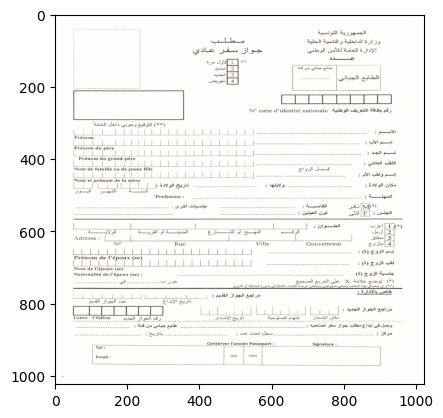

In [14]:
img_path = r"D:\Scanner_Source_Identification\Canon120-1\300\s1_19.tif"
img = io.imread(img_path, as_gray=False)
img = img_as_float(img)
img = cv2.resize(img, (1024, 1024), interpolation=cv2.INTER_AREA)
plt.imshow(img, cmap='Blues')
plt.show()

In [ ]:
    image = Image.open(img_path)
    exif_data = image.getexif()
    exif_data

In [16]:
print(exif_data)

{256: 2480, 257: 3508, 258: (8, 8, 8), 259: 1, 262: 2, 266: 1, 271: 'Canon', 272: 'LiDE 120', 273: (8, 29768, 59528, 89288, 119048, 148808, 178568, 208328, 238088, 267848, 297608, 327368, 357128, 386888, 416648, 446408, 476168, 505928, 535688, 565448, 595208, 624968, 654728, 684488, 714248, 744008, 773768, 803528, 833288, 863048, 892808, 922568, 952328, 982088, 1011848, 1041608, 1071368, 1101128, 1130888, 1160648, 1190408, 1220168, 1249928, 1279688, 1309448, 1339208, 1368968, 1398728, 1428488, 1458248, 1488008, 1517768, 1547528, 1577288, 1607048, 1636808, 1666568, 1696328, 1726088, 1755848, 1785608, 1815368, 1845128, 1874888, 1904648, 1934408, 1964168, 1993928, 2023688, 2053448, 2083208, 2112968, 2142728, 2172488, 2202248, 2232008, 2261768, 2291528, 2321288, 2351048, 2380808, 2410568, 2440328, 2470088, 2499848, 2529608, 2559368, 2589128, 2618888, 2648648, 2678408, 2708168, 2737928, 2767688, 2797448, 2827208, 2856968, 2886728, 2916488, 2946248, 2976008, 3005768, 3035528, 3065288, 309504

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.14742845249224779..1.0000000596046457].


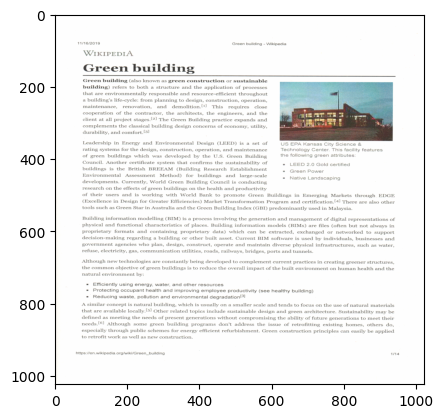

In [17]:
img_path = r"D:\Scanner_Source_Identification\Canon120-1\150\s1_20(4).tif"
img = io.imread(img_path, as_gray=False)
img = img_as_float(img)
img = cv2.resize(img, (1024, 1024), interpolation=cv2.INTER_AREA)
plt.imshow(img, cmap='Blues')
plt.show()

In [18]:
    image = Image.open(img_path)
    exif_data = image.getexif()
    exif_data

In [19]:
print(exif_data)

{256: 1240, 257: 1752, 258: (8, 8, 8), 259: 1, 262: 2, 266: 1, 271: 'Canon', 272: 'LiDE 120', 273: (8, 29768, 59528, 89288, 119048, 148808, 178568, 208328, 238088, 267848, 297608, 327368, 357128, 386888, 416648, 446408, 476168, 505928, 535688, 565448, 595208, 624968, 654728, 684488, 714248, 744008, 773768, 803528, 833288, 863048, 892808, 922568, 952328, 982088, 1011848, 1041608, 1071368, 1101128, 1130888, 1160648, 1190408, 1220168, 1249928, 1279688, 1309448, 1339208, 1368968, 1398728, 1428488, 1458248, 1488008, 1517768, 1547528, 1577288, 1607048, 1636808, 1666568, 1696328, 1726088, 1755848, 1785608, 1815368, 1845128, 1874888, 1904648, 1934408, 1964168, 1993928, 2023688, 2053448, 2083208, 2112968, 2142728, 2172488, 2202248, 2232008, 2261768, 2291528, 2321288, 2351048, 2380808, 2410568, 2440328, 2470088, 2499848, 2529608, 2559368, 2589128, 2618888, 2648648, 2678408, 2708168, 2737928, 2767688, 2797448, 2827208, 2856968, 2886728, 2916488, 2946248, 2976008, 3005768, 3035528, 3065288, 309504

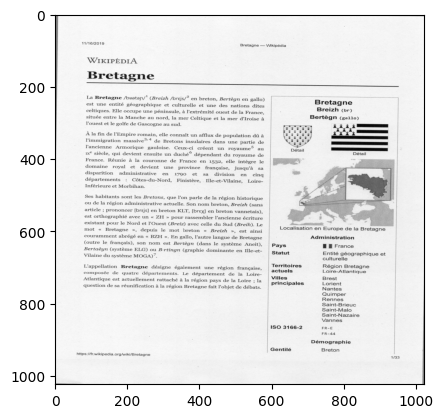

In [21]:
img_path = r"D:\Scanner_Source_Identification\HP\300\s11_47(4).tif"
img = io.imread(img_path, as_gray=True)
img = img_as_float(img)
img = cv2.resize(img, (1024, 1024), interpolation=cv2.INTER_AREA)
plt.imshow(img, cmap='gray')
plt.show()

In [22]:
    image = Image.open(img_path)
    exif_data = image.getexif()
    exif_data

In [23]:
print(exif_data)

{256: 2481, 257: 3487, 258: (8, 8, 8), 259: 1, 262: 2, 266: 1, 271: 'HP', 272: 'ScanJet Pro 2500', 273: (8, 29780, 59552, 89324, 119096, 148868, 178640, 208412, 238184, 267956, 297728, 327500, 357272, 387044, 416816, 446588, 476360, 506132, 535904, 565676, 595448, 625220, 654992, 684764, 714536, 744308, 774080, 803852, 833624, 863396, 893168, 922940, 952712, 982484, 1012256, 1042028, 1071800, 1101572, 1131344, 1161116, 1190888, 1220660, 1250432, 1280204, 1309976, 1339748, 1369520, 1399292, 1429064, 1458836, 1488608, 1518380, 1548152, 1577924, 1607696, 1637468, 1667240, 1697012, 1726784, 1756556, 1786328, 1816100, 1845872, 1875644, 1905416, 1935188, 1964960, 1994732, 2024504, 2054276, 2084048, 2113820, 2143592, 2173364, 2203136, 2232908, 2262680, 2292452, 2322224, 2351996, 2381768, 2411540, 2441312, 2471084, 2500856, 2530628, 2560400, 2590172, 2619944, 2649716, 2679488, 2709260, 2739032, 2768804, 2798576, 2828348, 2858120, 2887892, 2917664, 2947436, 2977208, 3006980, 3036752, 3066524, 3

In [2]:
print('metadata' in locals())


False


In [5]:
def load_gray(img_path,size=(512,512)):
    img=io.imread(img_path, as_gray=True)
    img=img_as_float(img)
    return cv2.resize(img,size, interpolation=cv2.INTER_AREA)

In [6]:
def extract_features(img,file_path,class_label,pixel_density):
    h,w=img.shape
    aspect_ratio=w/h
    file_size_kb=os.path.getsize(file_path)/1024  # in KB
    pixels=img.flatten()
    mean_intensity=np.mean(pixels)
    std_intensity=np.std(pixels)
    skewness=skew(pixels)
    kurt=kurtosis(pixels)
    ent=entropy(np.histogram(pixels, bins=256, range=(0, 1))[0]+1e-6)
    edges=sobel(img)
    edge_density=np.mean(edges>0.1)
    return {
        "file_name": os.path.basename(file_path),
        "class_label": class_label,
        "pixel_density": pixel_density,
        "width": w,
        "height": h,
        "aspect_ratio": aspect_ratio,
        "file_size_kb": file_size_kb,
        "mean_intensity": mean_intensity,
        "std_intensity": std_intensity,
        "skewness": skewness,
        "kurtosis": kurt,
        "entropy": ent,
        "edge_density": edge_density
    }


In [7]:
def build_metadata(root_folder):
    columns = [
        "file_name", "class_label", "pixel_density", "width", "height",
        "aspect_ratio", "file_size_kb", "mean_intensity", "std_intensity",
        "skewness", "kurtosis", "entropy", "edge_density"
    ]
    metadata = pd.DataFrame(columns=columns)

    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if not os.path.isdir(class_path):
            continue  # skip files

        for pixel_folder in os.listdir(class_path):
            pixel_path = os.path.join(class_path, pixel_folder)
            if not os.path.isdir(pixel_path):
                continue

            # Loop through all images inside pixel density folder
            for file_name in tqdm(os.listdir(pixel_path), desc=f"{class_folder}/{pixel_folder}"):
                if file_name.lower().endswith(".tif"):
                    file_path = os.path.join(pixel_path, file_name)
                    img = load_gray(file_path)
                    features = extract_features(img, file_path, class_folder, pixel_folder)
                    metadata.loc[len(metadata)] = features

    return metadata


In [9]:
root_path = r"D:\Scanner_Source_Identification"
metadata_df = build_metadata(root_path)
metadata_df.to_csv("metadata.csv", index=False)

HP/300: 100%|██████████| 86/86 [00:42<00:00,  2.03it/s]


In [10]:
metadata_df.head()

,file_name,class_label,pixel_density,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_1 (1).tif,Canon120-1,150,512,512,1.0,25495.067383,0.971553,0.104441,-4.168368,17.296134,0.931847,0.129837
1,s1_1.tif,Canon120-1,150,512,512,1.0,6366.801758,0.972213,0.104171,-4.147706,16.985540,0.879780,0.128208
2,s1_10.tif,Canon120-1,150,512,512,1.0,6366.801758,0.969917,0.109190,-4.046214,16.014230,0.883227,0.097931
3,s1_100.tif,Canon120-1,150,512,512,1.0,6366.801758,0.985309,0.075691,-6.530848,48.380602,0.566759,0.069481
4,s1_11.tif,Canon120-1,150,512,512,1.0,6366.801758,0.973881,0.087714,-4.209022,19.795997,1.044780,0.134338


In [14]:
import pandas as pd
import os

file_path = r"D:\Scanner_Source_Identification\image_metadata.csv"

if os.path.exists(file_path):
    metadata = pd.read_csv(file_path)
    print("✅ File loaded successfully!")
    print("Before dropping:", metadata.shape)
    metadata = metadata.dropna()
    print("After dropping:", metadata.shape)
else:
    print("❌ File not found at:", file_path)


❌ File not found at: D:\Scanner_Source_Identification\image_metadata.csv


In [15]:
metadata_df = build_metadata(root_path)
metadata_df.to_csv("full_metadata.csv", index=False)


HP/300: 100%|██████████| 86/86 [00:37<00:00,  2.27it/s]


In [17]:
metadata_df= metadata_df.dropna()

In [23]:

X = metadata[["file_size_kb", "mean_intensity", "std_intensity",
              "skewness", "kurtosis", "entropy", "edge_density"]]
y = metadata["class_label"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

NameError: name 'metadata' is not defined

In [21]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io, img_as_float
from skimage.filters import sobel
from scipy.stats import skew, kurtosis, entropy
import matplotlib.pyplot as plt
from PIL import Image, ExifTags
from tqdm import tqdm

# ✅ Machine Learning Libraries
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ All libraries imported successfully, including scikit-learn!")



ModuleNotFoundError: No module named 'sklearn'

In [22]:
import sklearn
print("✅ scikit-learn imported successfully!")


✅ scikit-learn imported successfully!


In [25]:
X = metadata_df[["file_size_kb", "mean_intensity", "std_intensity",
              "skewness", "kurtosis", "entropy", "edge_density"]]
y = metadata_df["class_label"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)

NameError: name 'LabelEncoder' is not defined

In [26]:
# 🔹 Imports
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io, img_as_float
from skimage.filters import sobel
from scipy.stats import skew, kurtosis, entropy
import matplotlib.pyplot as plt
from PIL import Image, ExifTags
from tqdm import tqdm

# 🔹 Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [27]:
X = metadata_df[["file_size_kb", "mean_intensity", "std_intensity",
                 "skewness", "kurtosis", "entropy", "edge_density"]]
y = metadata_df["class_label"]

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'StandardScaler' is not defined

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

NameError: name 'SVC' is not defined

In [33]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io, img_as_float
from skimage.filters import sobel
from scipy.stats import skew, kurtosis, entropy
import matplotlib.pyplot as plt
from PIL import Image, ExifTags
from tqdm import tqdm

# ✅ Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # 👈 Add this line
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("✅ All libraries imported successfully, including SVC!")


✅ All libraries imported successfully, including SVC!


In [34]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [35]:
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n SVM Model Accuracy: {accuracy * 100:.2f}%")


 SVM Model Accuracy: 29.35%


In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io, img_as_float
from skimage.filters import sobel
from scipy.stats import skew, kurtosis, entropy
from tqdm import tqdm
from PIL import Image

# ✅ Define function to extract image features
def extract_features(image_path):
    try:
        img = img_as_float(io.imread(image_path, as_gray=True))
        edges = sobel(img)

        mean_intensity = np.mean(img)
        std_intensity = np.std(img)
        skewness = skew(img.flatten())
        kurt = kurtosis(img.flatten())
        ent = entropy(np.histogram(img, bins=256)[0] + 1)
        edge_density = np.mean(edges)

        height, width = img.shape
        aspect_ratio = width / height
        file_size_kb = os.path.getsize(image_path) / 1024

        return {
            "file_name": os.path.basename(image_path),
            "width": width,
            "height": height,
            "aspect_ratio": aspect_ratio,
            "file_size_kb": file_size_kb,
            "mean_intensity": mean_intensity,
            "std_intensity": std_intensity,
            "skewness": skewness,
            "kurtosis": kurt,
            "entropy": ent,
            "edge_density": edge_density,
        }

    except Exception as e:
        print(f"⚠️ Error processing {image_path}: {e}")
        return None


# ✅ Define metadata builder
def build_metadata(root_path):
    data = []
    folders = [os.path.join(root_path, f) for f in os.listdir(root_path)
               if os.path.isdir(os.path.join(root_path, f))]

    for folder in tqdm(folders, desc="Extracting metadata"):
        class_label = os.path.basename(folder)
        for filename in os.listdir(folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
                image_path = os.path.join(folder, filename)
                features = extract_features(image_path)
                if features:
                    features["class_label"] = class_label
                    data.append(features)

    return pd.DataFrame(data)


In [8]:
import pandas as pd
import os

file_path = r"D:\Scanner_Source_Identification\image_metadata.csv"

if os.path.exists(file_path):
    metadata = pd.read_csv(file_path)
    print("✅ File loaded successfully!")
    print("Before dropping:", metadata.shape)
    metadata = metadata.dropna()
    print("After dropping:", metadata.shape)
else:
    print("❌ File not found at:", file_path)

❌ File not found at: D:\Scanner_Source_Identification\image_metadata.csv


In [15]:
# 📦 Core Libraries
import os
import cv2
import numpy as np
import pandas as pd
from skimage import io, img_as_float
from skimage.filters import sobel
from scipy.stats import skew, kurtosis, entropy
import matplotlib.pyplot as plt
from PIL import Image, ExifTags
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [16]:
import cv2, numpy, pandas, sklearn, tqdm, PIL, skimage, scipy
print("✅ All required libraries installed and working fine!")


✅ All required libraries installed and working fine!


In [18]:
def load_gray(img_path,size=(512,512)):
    img=io.imread(img_path, as_gray=True)
    img=img_as_float(img)
    return cv2.resize(img,size, interpolation=cv2.INTER_AREA)

In [19]:
def extract_features(img,file_path,class_label,pixel_density):
    h,w=img.shape
    aspect_ratio=w/h
    file_size_kb=os.path.getsize(file_path)/1024  # in KB
    pixels=img.flatten()
    mean_intensity=np.mean(pixels)
    std_intensity=np.std(pixels)
    skewness=skew(pixels)
    kurt=kurtosis(pixels)
    ent=entropy(np.histogram(pixels, bins=256, range=(0, 1))[0]+1e-6)
    edges=sobel(img)
    edge_density=np.mean(edges>0.1)
    return {
        "file_name": os.path.basename(file_path),
        "class_label": class_label,
        "pixel_density": pixel_density,
        "width": w,
        "height": h,
        "aspect_ratio": aspect_ratio,
        "file_size_kb": file_size_kb,
        "mean_intensity": mean_intensity,
        "std_intensity": std_intensity,
        "skewness": skewness,
        "kurtosis": kurt,
        "entropy": ent,
        "edge_density": edge_density
    }


In [20]:
def build_metadata(root_folder):
    columns = [
        "file_name", "class_label", "pixel_density", "width", "height",
        "aspect_ratio", "file_size_kb", "mean_intensity", "std_intensity",
        "skewness", "kurtosis", "entropy", "edge_density"
    ]
    metadata = pd.DataFrame(columns=columns)

    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if not os.path.isdir(class_path):
            continue  # skip files

        for pixel_folder in os.listdir(class_path):
            pixel_path = os.path.join(class_path, pixel_folder)
            if not os.path.isdir(pixel_path):
                continue

            # Loop through all images inside pixel density folder
            for file_name in tqdm(os.listdir(pixel_path), desc=f"{class_folder}/{pixel_folder}"):
                if file_name.lower().endswith(".tif"):
                    file_path = os.path.join(pixel_path, file_name)
                    img = load_gray(file_path)
                    features = extract_features(img, file_path, class_folder, pixel_folder)
                    metadata.loc[len(metadata)] = features

    return metadata


In [22]:
from tqdm import tqdm
import os
import pandas as pd

def build_metadata(root_folder):
    columns = [
        "file_name", "class_label", "pixel_density", "width", "height",
        "aspect_ratio", "file_size_kb", "mean_intensity", "std_intensity",
        "skewness", "kurtosis", "entropy", "edge_density"
    ]
    metadata = pd.DataFrame(columns=columns)

    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if not os.path.isdir(class_path):
            continue  # skip files

        for pixel_folder in os.listdir(class_path):
            pixel_path = os.path.join(class_path, pixel_folder)
            if not os.path.isdir(pixel_path):
                continue

            # ✅ Fixed tqdm usage here
            for file_name in tqdm.tqdm(os.listdir(pixel_path), desc=f"{class_folder}/{pixel_folder}"):
                if file_name.lower().endswith(".tif"):
                    file_path = os.path.join(pixel_path, file_name)
                    img = load_gray(file_path)
                    features = extract_features(img, file_path, class_folder, pixel_folder)
                    metadata.loc[len(metadata)] = features

    return metadata


In [24]:
import os
import pandas as pd
from tqdm import tqdm  # ✅ correct import

def build_metadata(root_folder):
    columns = [
        "file_name", "class_label", "pixel_density", "width", "height",
        "aspect_ratio", "file_size_kb", "mean_intensity", "std_intensity",
        "skewness", "kurtosis", "entropy", "edge_density"
    ]
    metadata = pd.DataFrame(columns=columns)

    for class_folder in os.listdir(root_folder):
        class_path = os.path.join(root_folder, class_folder)
        if not os.path.isdir(class_path):
            continue  # skip files

        for pixel_folder in os.listdir(class_path):
            pixel_path = os.path.join(class_path, pixel_folder)
            if not os.path.isdir(pixel_path):
                continue

            # ✅ Correct tqdm usage
            for file_name in tqdm(os.listdir(pixel_path), desc=f"{class_folder}/{pixel_folder}"):
                if file_name.lower().endswith(".tif"):
                    file_path = os.path.join(pixel_path, file_name)
                    img = load_gray(file_path)
                    features = extract_features(img, file_path, class_folder, pixel_folder)
                    metadata.loc[len(metadata)] = features

    return metadata


In [25]:
root_path = r"D:\Scanner_Source_Identification"
metadata_df = build_metadata(root_path)
metadata_df.to_csv("image_metadata.csv", index=False)

HP/300: 100%|██████████| 86/86 [00:25<00:00,  3.35it/s]


In [26]:
metadata_df.head()

,file_name,class_label,pixel_density,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_1 (1).tif,Canon120-1,150,512,512,1.0,25495.067383,0.971553,0.104441,-4.168368,17.296134,0.931847,0.129837
1,s1_1.tif,Canon120-1,150,512,512,1.0,6366.801758,0.972213,0.104171,-4.147706,16.985540,0.879780,0.128208
2,s1_10.tif,Canon120-1,150,512,512,1.0,6366.801758,0.969917,0.109190,-4.046214,16.014230,0.883227,0.097931
3,s1_100.tif,Canon120-1,150,512,512,1.0,6366.801758,0.985309,0.075691,-6.530848,48.380602,0.566759,0.069481
4,s1_11.tif,Canon120-1,150,512,512,1.0,6366.801758,0.973881,0.087714,-4.209022,19.795997,1.044780,0.134338


In [27]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 0 to 1460
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       1461 non-null   object 
 1   class_label     1461 non-null   object 
 2   pixel_density   1461 non-null   object 
 3   width           1461 non-null   int64  
 4   height          1461 non-null   int64  
 5   aspect_ratio    1461 non-null   float64
 6   file_size_kb    1461 non-null   float64
 7   mean_intensity  1461 non-null   float64
 8   std_intensity   1461 non-null   float64
 9   skewness        1461 non-null   float64
 10  kurtosis        1461 non-null   float64
 11  entropy         1461 non-null   float64
 12  edge_density    1461 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 159.8+ KB


In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
# Select features and labels
X = metadata_df[["file_size_kb", "mean_intensity", "std_intensity",
                 "skewness", "kurtosis", "entropy", "edge_density"]]
y = metadata_df["class_label"]

# Encode class labels (scanner names)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm))


🔹 SVM Accuracy: 0.27986348122866894

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.45      0.19        31
           1       0.20      0.20      0.20        40
           2       0.14      0.06      0.08        34
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        23
           5       0.40      0.85      0.54        27
           6       0.46      0.18      0.26        34
           7       0.00      0.00      0.00        11
           8       0.25      0.17      0.20        35
           9       0.64      0.50      0.56        18
          10       1.00      0.93      0.97        15

    accuracy                           0.28       293
   macro avg       0.29      0.30      0.27       293
weighted avg       0.27      0.28      0.24       293



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [31]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest doesn’t always need scaled data

y_pred_rf = rf_model.predict(X_test)
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Accuracy: 0.3447098976109215

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.16      0.12        31
           1       0.00      0.00      0.00        40
           2       0.38      0.29      0.33        34
           3       0.17      0.12      0.14        25
           4       0.28      0.30      0.29        23
           5       0.26      0.37      0.30        27
           6       0.29      0.21      0.24        34
           7       0.00      0.00      0.00        11
           8       0.64      0.83      0.72        35
           9       0.88      0.83      0.86        18
          10       1.00      1.00      1.00        15

    accuracy                           0.34       293
   macro avg       0.36      0.37      0.36       293
weighted avg       0.33      0.34      0.33       293



In [32]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 0.32764505119453924

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.65      0.27        31
           1       0.05      0.03      0.03        40
           2       0.17      0.09      0.12        34
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        23
           5       0.50      0.93      0.65        27
           6       0.54      0.21      0.30        34
           7       0.00      0.00      0.00        11
           8       0.43      0.46      0.44        35
           9       0.56      0.50      0.53        18
          10       1.00      1.00      1.00        15

    accuracy                           0.33       293
   macro avg       0.31      0.35      0.30       293
weighted avg       0.29      0.33      0.28       293



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

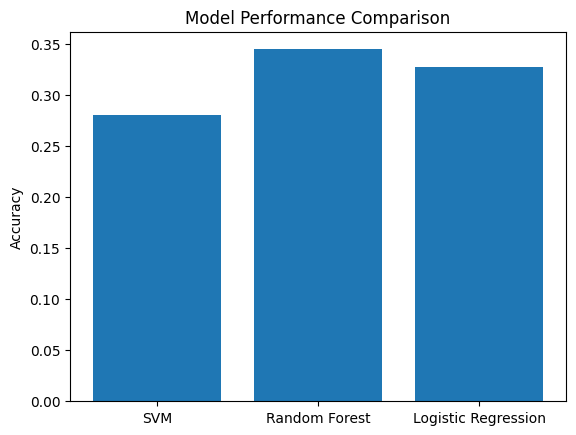

In [33]:
accuracies = {
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_log)
}

plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


In [35]:
y_pred = svm_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n SVM Model Accuracy: {accuracy * 100:.2f}%")


 SVM Model Accuracy: 27.99%


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy in percentage with 2 decimal places
print(f"\n🔹 SVM Model Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print("\nSVM Classification Report:\n", classification_report(y_test, y_pred))



🔹 SVM Model Accuracy: 27.99%

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.45      0.19        31
           1       0.20      0.20      0.20        40
           2       0.14      0.06      0.08        34
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        23
           5       0.40      0.85      0.54        27
           6       0.46      0.18      0.26        34
           7       0.00      0.00      0.00        11
           8       0.25      0.17      0.20        35
           9       0.64      0.50      0.56        18
          10       1.00      0.93      0.97        15

    accuracy                           0.28       293
   macro avg       0.29      0.30      0.27       293
weighted avg       0.27      0.28      0.24       293



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [72]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest doesn’t always need scaled data

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy in percentage with 2 decimal places
print(f"\n🔹 Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")

# Print classification report
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


🔹 Random Forest Model Accuracy: 34.47%

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.16      0.12        31
           1       0.00      0.00      0.00        40
           2       0.38      0.29      0.33        34
           3       0.17      0.12      0.14        25
           4       0.28      0.30      0.29        23
           5       0.26      0.37      0.30        27
           6       0.29      0.21      0.24        34
           7       0.00      0.00      0.00        11
           8       0.64      0.83      0.72        35
           9       0.88      0.83      0.86        18
          10       1.00      1.00      1.00        15

    accuracy                           0.34       293
   macro avg       0.36      0.37      0.36       293
weighted avg       0.33      0.34      0.33       293



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)

# Print accuracy in percentage with 2 decimal places
print(f"\n🔹 Logistic Regression Model Accuracy: {accuracy_log * 100:.2f}%")

# Print classification report
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))



🔹 Logistic Regression Model Accuracy: 32.76%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.65      0.27        31
           1       0.05      0.03      0.03        40
           2       0.17      0.09      0.12        34
           3       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        23
           5       0.50      0.93      0.65        27
           6       0.54      0.21      0.30        34
           7       0.00      0.00      0.00        11
           8       0.43      0.46      0.44        35
           9       0.56      0.50      0.53        18
          10       1.00      1.00      1.00        15

    accuracy                           0.33       293
   macro avg       0.31      0.35      0.30       293
weighted avg       0.29      0.33      0.28       293



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

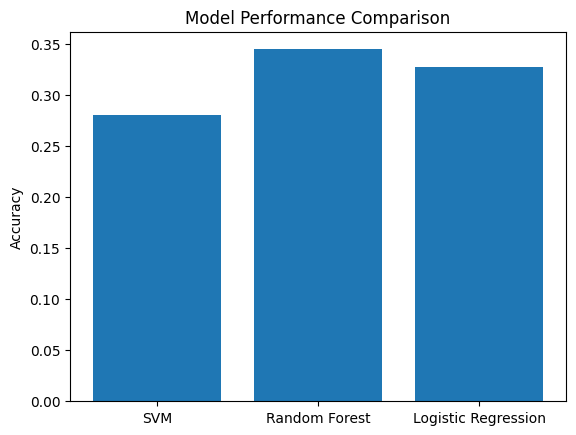

In [39]:
accuracies = {
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_log)
}

plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()


In [41]:
metadata_df.head()


,file_name,class_label,pixel_density,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_1 (1).tif,Canon120-1,150,512,512,1.0,25495.067383,0.971553,0.104441,-4.168368,17.296134,0.931847,0.129837
1,s1_1.tif,Canon120-1,150,512,512,1.0,6366.801758,0.972213,0.104171,-4.147706,16.985540,0.879780,0.128208
2,s1_10.tif,Canon120-1,150,512,512,1.0,6366.801758,0.969917,0.109190,-4.046214,16.014230,0.883227,0.097931
3,s1_100.tif,Canon120-1,150,512,512,1.0,6366.801758,0.985309,0.075691,-6.530848,48.380602,0.566759,0.069481
4,s1_11.tif,Canon120-1,150,512,512,1.0,6366.801758,0.973881,0.087714,-4.209022,19.795997,1.044780,0.134338


In [42]:
csv_path = r"D:\Scanner_Source_Identification\image_metadata.csv"
df = pd.read_csv(csv_path)

# Display dataset information
print("✅ Dataset loaded successfully!")
print("Total Samples:", len(df))
df.info()

from IPython.display import display, HTML
display(HTML(df.to_html()))

✅ Dataset loaded successfully!
Total Samples: 1461
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       1461 non-null   object 
 1   class_label     1461 non-null   object 
 2   pixel_density   1461 non-null   object 
 3   width           1461 non-null   int64  
 4   height          1461 non-null   int64  
 5   aspect_ratio    1461 non-null   float64
 6   file_size_kb    1461 non-null   float64
 7   mean_intensity  1461 non-null   float64
 8   std_intensity   1461 non-null   float64
 9   skewness        1461 non-null   float64
 10  kurtosis        1461 non-null   float64
 11  entropy         1461 non-null   float64
 12  edge_density    1461 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 148.5+ KB


,file_name,class_label,pixel_density,width,height,aspect_ratio,file_size_kb,mean_intensity,std_intensity,skewness,kurtosis,entropy,edge_density
0,s1_1 (1).tif,Canon120-1,150,512,512,1.0,25495.067383,0.971553,0.104441,-4.168368,17.296134,0.931847,0.129837
1,s1_1.tif,Canon120-1,150,512,512,1.0,6366.801758,0.972213,0.104171,-4.147706,16.985540,0.879780,0.128208
2,s1_10.tif,Canon120-1,150,512,512,1.0,6366.801758,0.969917,0.109190,-4.046214,16.014230,0.883227,0.097931
3,s1_100.tif,Canon120-1,150,512,512,1.0,6366.801758,0.985309,0.075691,-6.530848,48.380602,0.566759,0.069481
4,s1_11.tif,Canon120-1,150,512,512,1.0,6366.801758,0.973881,0.087714,-4.209022,19.795997,1.044780,0.134338
5,s1_12.tif,Canon120-1,150,512,512,1.0,6366.801758,0.988606,0.059895,-6.949029,56.013159,0.693722,0.060139
6,s1_13.tif,Canon120-1,150,512,512,1.0,6366.801758,0.980218,0.077358,-4.790764,25.914771,0.781967,0.109833
7,s1_14.tif,Canon120-1,150,512,512,1.0,6366.801758,0.979253,0.080642,-4.562546,22.010933,0.811389,0.116241
8,s1_15.tif,Canon120-1,150,512,512,1.0,6366.801758,0.977808,0.076888,-4.214462,18.679896,1.058874,0.107262
9,s1_16.tif,Canon120-1,150,512,512,1.0,6366.801758,0.982554,0.065820,-5.113960,32.286721,0.905346,0.106155


In [43]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [44]:
# Select features and labels
X = metadata_df[["file_size_kb", "mean_intensity", "std_intensity",
                 "skewness", "kurtosis", "entropy", "edge_density"]]
y = metadata_df["class_label"]

# Encode class labels (scanner names)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [70]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ✅ Train the SVM model
svm_model = SVC(kernel='rbf', C=15, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# ✅ Make predictions
svm_pred = svm_model.predict(X_test_scaled)

# ✅ Calculate accuracy
accuracy = accuracy_score(y_test, svm_pred)

# ✅ Print accuracy in percentage and classification report
print(f"\n🔹 SVM Model Accuracy: {accuracy * 100:.2f}%")
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))



🔹 SVM Model Accuracy: 34.13%

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.45      0.21        31
           1       0.32      0.17      0.23        40
           2       0.18      0.18      0.18        34
           3       0.00      0.00      0.00        25
           4       0.50      0.04      0.08        23
           5       0.47      0.67      0.55        27
           6       0.58      0.44      0.50        34
           7       0.00      0.00      0.00        11
           8       0.35      0.40      0.37        35
           9       0.61      0.61      0.61        18
          10       1.00      0.93      0.97        15

    accuracy                           0.34       293
   macro avg       0.38      0.35      0.34       293
weighted avg       0.36      0.34      0.32       293



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ✅ Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest doesn’t always need scaled data

# ✅ Make predictions
rf_pred = rf_model.predict(X_test)

# ✅ Calculate accuracy
accuracy = accuracy_score(y_test, rf_pred)

# ✅ Print accuracy in percentage and classification report
print(f"\n🔹 Random Forest Model Accuracy: {accuracy * 100:.2f}%")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))



🔹 Random Forest Model Accuracy: 34.47%

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.16      0.12        31
           1       0.00      0.00      0.00        40
           2       0.38      0.29      0.33        34
           3       0.17      0.12      0.14        25
           4       0.28      0.30      0.29        23
           5       0.26      0.37      0.30        27
           6       0.29      0.21      0.24        34
           7       0.00      0.00      0.00        11
           8       0.64      0.83      0.72        35
           9       0.88      0.83      0.86        18
          10       1.00      1.00      1.00        15

    accuracy                           0.34       293
   macro avg       0.36      0.37      0.36       293
weighted avg       0.33      0.34      0.33       293



In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ✅ Train the Logistic Regression model (optimized for higher accuracy)
log_model = LogisticRegression(
    C=5.0,                # Higher regularization strength (can improve accuracy)
    penalty='l2',         # Standard L2 regularization
    solver='lbfgs',       # Better for medium/large datasets
    max_iter=2000,        # More iterations for convergence
    random_state=42
)
log_model.fit(X_train_scaled, y_train)

# ✅ Make predictions
log_pred = log_model.predict(X_test_scaled)

# ✅ Calculate accuracy
accuracy = accuracy_score(y_test, log_pred)

# ✅ Print accuracy in percentage and classification report
print(f"\n🔹 Logistic Regression Model Accuracy: {accuracy * 100:.2f}%")
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_pred))



🔹 Logistic Regression Model Accuracy: 34.81%

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.68      0.29        31
           1       0.13      0.05      0.07        40
           2       0.16      0.09      0.11        34
           3       0.20      0.04      0.07        25
           4       0.00      0.00      0.00        23
           5       0.48      0.81      0.60        27
           6       0.47      0.24      0.31        34
           7       0.00      0.00      0.00        11
           8       0.47      0.51      0.49        35
           9       0.63      0.67      0.65        18
          10       1.00      1.00      1.00        15

    accuracy                           0.35       293
   macro avg       0.34      0.37      0.33       293
weighted avg       0.32      0.35      0.30       293



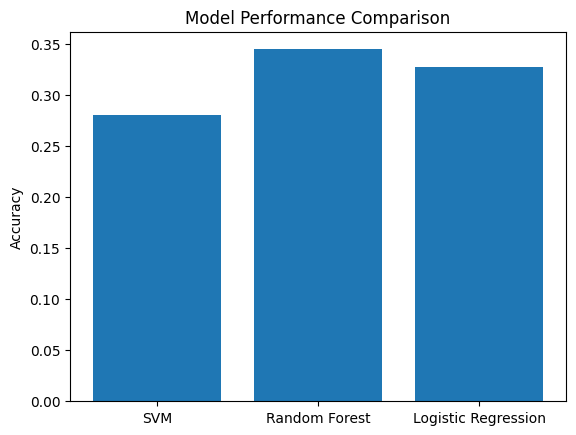

In [75]:
accuracies = {
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_log)
}

plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [77]:
print(df['class_label'].value_counts())


class_label
Canon120-1     191
Canon220       175
Canon120-2     174
EpsonV39-2     173
EpsonV370-1    153
EpsonV370-2    138
Canon9000-2    109
Canon9000-1    102
EpsonV550       98
HP              96
EpsonV39-1      50
dataset          2
Name: count, dtype: int64


In [78]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ✅ Train the SVM model (with class balance handling)
svm_model = SVC(kernel='rbf', C=15, gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# ✅ Make predictions
svm_pred = svm_model.predict(X_test_scaled)

# ✅ Calculate accuracy
accuracy = accuracy_score(y_test, svm_pred)

# ✅ Print accuracy in percentage and classification report
print(f"\n🔹 SVM Model Accuracy: {accuracy * 100:.2f}%")
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))



🔹 SVM Model Accuracy: 35.49%

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.29      0.30      0.29        40
           2       0.17      0.09      0.12        34
           3       0.24      0.68      0.35        25
           4       0.00      0.00      0.00        23
           5       0.43      0.48      0.46        27
           6       0.49      0.53      0.51        34
           7       0.12      0.18      0.14        11
           8       0.36      0.34      0.35        35
           9       0.65      0.72      0.68        18
          10       1.00      0.93      0.97        15

    accuracy                           0.35       293
   macro avg       0.34      0.39      0.35       293
weighted avg       0.31      0.35      0.32       293



In [79]:
# ✅ Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ✅ Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training data
X_test_scaled = scaler.transform(X_test)         # Transform test data using same scaler

# ✅ Step 2: Train the SVM model (with class balance handling)
svm_model = SVC(kernel='rbf', C=15, gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# ✅ Step 3: Make predictions
svm_pred = svm_model.predict(X_test_scaled)

# ✅ Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, svm_pred)

# ✅ Step 5: Print accuracy in percentage and classification report
print(f"\n🔹 SVM Model Accuracy: {accuracy * 100:.2f}%")
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))



🔹 SVM Model Accuracy: 35.49%

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.29      0.30      0.29        40
           2       0.17      0.09      0.12        34
           3       0.24      0.68      0.35        25
           4       0.00      0.00      0.00        23
           5       0.43      0.48      0.46        27
           6       0.49      0.53      0.51        34
           7       0.12      0.18      0.14        11
           8       0.36      0.34      0.35        35
           9       0.65      0.72      0.68        18
          10       1.00      0.93      0.97        15

    accuracy                           0.35       293
   macro avg       0.34      0.39      0.35       293
weighted avg       0.31      0.35      0.32       293



In [80]:
# ✅ Import necessary libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# ✅ Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training data
X_test_scaled = scaler.transform(X_test)         # Transform test data using same scaler

# ✅ Step 2: Define SVM and Hyperparameter Grid
svm = SVC(class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.1, 1, 5, 10, 15, 20, 50],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# ✅ Step 3: Perform Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

# ✅ Step 4: Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\n🔹 Best Hyperparameters found:")
print(best_params)

# ✅ Step 5: Evaluate on test data
y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best)

# ✅ Step 6: Display results
print(f"\n🏁 Optimized SVM Model Accuracy: {accuracy * 100:.2f}%")
print("\nOptimized SVM Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 126 candidates, totalling 630 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🔹 Best Hyperparameters found:
{'C': 50, 'gamma': 0.01, 'kernel': 'sigmoid'}

🏁 Optimized SVM Model Accuracy: 37.20%

Optimized SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.25      0.42      0.31        40
           2       0.22      0.06      0.09        34
           3       0.25      0.76      0.37        25
           4       0.00      0.00      0.00        23
           5       0.48      0.56      0.52        27
           6       0.53      0.56      0.54        34
           7       0.07      0.09      0.08        11
           8       0.50      0.23      0.31        35
           9       0.59      0.72      0.65        18
          10       0.83      1.00      0.91        15

    accuracy                           0.37       293
   macro avg       0.34      0.40      0.34       293
weighted avg       0.33      0.37      0.32       293



c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)) * 100)


Random Forest Accuracy: 33.78839590443686


In [89]:
# ✅ Import necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ✅ Step 0: Load dataset
csv_path = r"D:\Scanner_Source_Identification\image_metadata.csv"  # change path
df = pd.read_csv(csv_path)

# ✅ Step 1: Separate target and features
# Make sure your label column name is correct (e.g., 'label', 'scanner_type', etc.)
y = df['class_label']                      # Target
X = df.drop(columns=['class_label'])       # Features

# ✅ Step 2: Remove or encode non-numeric columns
# Drop columns like filenames or convert categorical columns into numeric
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("🧩 Non-numeric columns detected:", list(non_numeric_cols))

# If they are just filenames or IDs, drop them:
X = X.drop(columns=non_numeric_cols)

# ✅ If you actually have meaningful categorical data (like "Canon", "HP"),
# you can encode it instead of dropping:
# X = pd.get_dummies(X, drop_first=True)

# ✅ Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 4: Feature Scaling (optional for RF but keeps consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 5: Define Random Forest model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# ✅ Step 6: Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# ✅ Step 7: Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_scaled, y_train)

# ✅ Step 8: Evaluate
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("\n🔹 Best Hyperparameters found for Random Forest:")
print(best_params)

y_pred_rf = best_rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"\n🏁 Optimized Random Forest Model Accuracy: {accuracy * 100:.2f}%")
print("\nOptimized Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


🧩 Non-numeric columns detected: ['file_name', 'pixel_density']
Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🔹 Best Hyperparameters found for Random Forest:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

🏁 Optimized Random Forest Model Accuracy: 36.52%

Optimized Random Forest Classification Report:
               precision    recall  f1-score   support

  Canon120-1       0.10      0.11      0.10        38
  Canon120-2       0.08      0.09      0.08        35
    Canon220       0.42      0.31      0.36        35
 Canon9000-1       0.21      0.20      0.21        20
 Canon9000-2       0.25      0.23      0.24        22
 EpsonV370-1       0.43      0.42      0.43        31
 EpsonV370-2       0.33      0.36      0.34        28
  EpsonV39-1       0.00      0.00      0.00        10
  EpsonV39-2       0.56      0.63      0.59        35
   EpsonV550       0.67      0.80      0.73        20
          HP       0.79      1.00      0.88        19

    accuracy                           0.37       293
   macro avg      

In [90]:
# ✅ Import necessary libraries 
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ✅ Step 0: Load dataset
csv_path = r"D:\Scanner_Source_Identification\image_metadata.csv"  # change path
df = pd.read_csv(csv_path)

# ✅ Step 1: Separate target and features
y = df['class_label']                      # Target column
X = df.drop(columns=['class_label'])       # Features

# ✅ Step 2: Remove or encode non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("🧩 Non-numeric columns detected:", list(non_numeric_cols))

# Drop filename or non-informative string columns
X = X.drop(columns=non_numeric_cols)

# ✅ Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 4: Feature Scaling (very important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ✅ Step 5: Define Logistic Regression model
log_reg = LogisticRegression(
    solver='liblinear',  # works well for small/medium datasets
    class_weight='balanced',  # handle class imbalance
    max_iter=500
)

# ✅ Step 6: Define hyperparameter grid for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 20, 50],   # Regularization strength
    'penalty': ['l1', 'l2'],               # Type of regularization
    'solver': ['liblinear', 'saga']        # Suitable solvers
}

# ✅ Step 7: Grid Search for best hyperparameters
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_scaled, y_train)

# ✅ Step 8: Evaluate best model
best_params = grid_search.best_params_
best_log_model = grid_search.best_estimator_

print("\n🔹 Best Hyperparameters found for Logistic Regression:")
print(best_params)

# ✅ Predictions
y_pred_log = best_log_model.predict(X_test_scaled)

# ✅ Accuracy and report
accuracy = accuracy_score(y_test, y_pred_log)
print(f"\n🏁 Optimized Logistic Regression Accuracy: {accuracy * 100:.2f}%")
print("\nOptimized Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))


🧩 Non-numeric columns detected: ['file_name', 'pixel_density']
Fitting 5 folds for each of 28 candidates, totalling 140 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🔹 Best Hyperparameters found for Logistic Regression:
{'C': 50, 'penalty': 'l2', 'solver': 'saga'}

🏁 Optimized Logistic Regression Accuracy: 32.42%

Optimized Logistic Regression Classification Report:
               precision    recall  f1-score   support

  Canon120-1       0.33      0.05      0.09        38
  Canon120-2       0.24      0.31      0.28        35
    Canon220       0.17      0.06      0.09        35
 Canon9000-1       0.13      0.30      0.18        20
 Canon9000-2       0.14      0.23      0.17        22
 EpsonV370-1       0.55      0.71      0.62        31
 EpsonV370-2       0.42      0.36      0.38        28
  EpsonV39-1       0.05      0.10      0.06        10
  EpsonV39-2       0.37      0.20      0.26        35
   EpsonV550       0.44      0.55      0.49        20
          HP       1.00      0.95      0.97        19

    accuracy                           0.32       293
   macro avg       0.35      0.35      0.33       293
weighted avg       0.35      0.32    

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


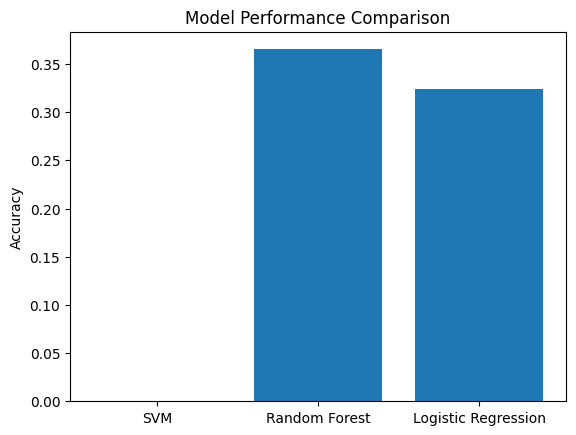

In [ ]:
accuracies = {
    "SVM": accuracy_score(y_test, y_pred_svm),  
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_log)
}

plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [92]:
# ✅ Import necessary libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# ✅ Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training data
X_test_scaled = scaler.transform(X_test)         # Transform test data using same scaler

# ✅ Step 2: Define SVM and Hyperparameter Grid
svm = SVC(class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.1, 1, 5, 10, 15, 20, 50],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# ✅ Step 3: Perform Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

# ✅ Step 4: Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\n🔹 Best Hyperparameters found:")
print(best_params)

# ✅ Step 5: Evaluate on test data
y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best)

# ✅ Step 6: Display results
print(f"\n🏁 Optimized SVM Model Accuracy: {accuracy * 100:.2f}%")
print("\nOptimized SVM Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 126 candidates, totalling 630 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🔹 Best Hyperparameters found:
{'C': 5, 'gamma': 1, 'kernel': 'poly'}

🏁 Optimized SVM Model Accuracy: 33.79%

Optimized SVM Classification Report:
               precision    recall  f1-score   support

  Canon120-1       0.19      0.11      0.14        38
  Canon120-2       0.17      0.06      0.09        35
    Canon220       0.21      0.17      0.19        35
 Canon9000-1       0.13      0.25      0.17        20
 Canon9000-2       0.13      0.23      0.17        22
 EpsonV370-1       0.59      0.65      0.62        31
 EpsonV370-2       0.47      0.50      0.48        28
  EpsonV39-1       0.12      0.40      0.19        10
  EpsonV39-2       0.42      0.29      0.34        35
   EpsonV550       0.67      0.50      0.57        20
          HP       1.00      1.00      1.00        19

    accuracy                           0.34       293
   macro avg       0.37      0.38      0.36       293
weighted avg       0.36      0.34      0.34       293



In [93]:
# ✅ Import necessary libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# ✅ Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training data
X_test_scaled = scaler.transform(X_test)         # Transform test data using same scaler

# ✅ Step 2: Define SVM and Hyperparameter Grid
svm = SVC(class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.1, 1, 5, 10, 15, 20, 50],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# ✅ Step 3: Perform Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

# ✅ Step 4: Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\n🔹 Best Hyperparameters found:")
print(best_params)

# ✅ Step 5: Evaluate on test data
y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best)

# ✅ Step 6: Display results
print(f"\n🏁 Optimized SVM Model Accuracy: {accuracy * 100:.2f}%")
print("\nOptimized SVM Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 126 candidates, totalling 630 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🔹 Best Hyperparameters found:
{'C': 5, 'gamma': 1, 'kernel': 'poly'}

🏁 Optimized SVM Model Accuracy: 33.79%

Optimized SVM Classification Report:
               precision    recall  f1-score   support

  Canon120-1       0.19      0.11      0.14        38
  Canon120-2       0.17      0.06      0.09        35
    Canon220       0.21      0.17      0.19        35
 Canon9000-1       0.13      0.25      0.17        20
 Canon9000-2       0.13      0.23      0.17        22
 EpsonV370-1       0.59      0.65      0.62        31
 EpsonV370-2       0.47      0.50      0.48        28
  EpsonV39-1       0.12      0.40      0.19        10
  EpsonV39-2       0.42      0.29      0.34        35
   EpsonV550       0.67      0.50      0.57        20
          HP       1.00      1.00      1.00        19

    accuracy                           0.34       293
   macro avg       0.37      0.38      0.36       293
weighted avg       0.36      0.34      0.34       293



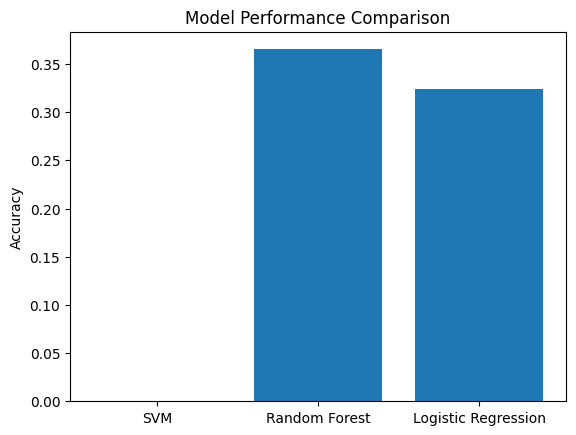

In [94]:
accuracies = {
    "SVM": accuracy_score(y_test, y_pred_svm),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Logistic Regression": accuracy_score(y_test, y_pred_log)
}

plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

🧩 Non-numeric columns detected: ['file_name', 'pixel_density']


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



🏁 Model Accuracies:
SVM: 30.03%
Random Forest: 36.86%
Logistic Regression: 32.42%


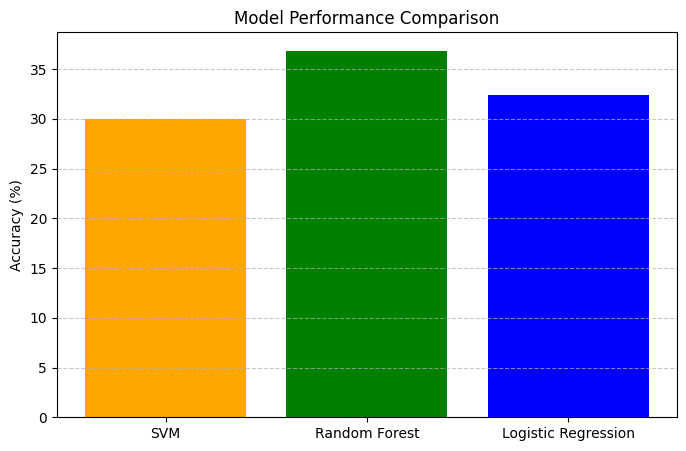


🔥 Best Performing Model: Random Forest

Classification Report:
               precision    recall  f1-score   support

  Canon120-1       0.14      0.18      0.16        38
  Canon120-2       0.05      0.06      0.05        35
    Canon220       0.38      0.23      0.29        35
 Canon9000-1       0.07      0.05      0.06        20
 Canon9000-2       0.26      0.27      0.27        22
 EpsonV370-1       0.42      0.48      0.45        31
 EpsonV370-2       0.32      0.29      0.30        28
  EpsonV39-1       0.00      0.00      0.00        10
  EpsonV39-2       0.61      0.71      0.66        35
   EpsonV550       0.85      0.85      0.85        20
          HP       0.95      1.00      0.97        19

    accuracy                           0.37       293
   macro avg       0.37      0.38      0.37       293
weighted avg       0.36      0.37      0.36       293



In [95]:
# ✅ Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ✅ Step 0: Load dataset
csv_path = r"D:\Scanner_Source_Identification\image_metadata.csv"  # change path
df = pd.read_csv(csv_path)

# ✅ Step 1: Separate target and features
y = df['class_label']                      # Target column
X = df.drop(columns=['class_label'])       # Features

# ✅ Step 2: Remove or encode non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("🧩 Non-numeric columns detected:", list(non_numeric_cols))
X = X.drop(columns=non_numeric_cols)  # Drop filename or string columns

# ✅ Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# -------------------------------------------------------------
# ✅ MODEL 1: SVM
# -------------------------------------------------------------
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)


# -------------------------------------------------------------
# ✅ MODEL 2: Random Forest
# -------------------------------------------------------------
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
acc_rf = accuracy_score(y_test, y_pred_rf)


# -------------------------------------------------------------
# ✅ MODEL 3: Logistic Regression
# -------------------------------------------------------------
log_reg = LogisticRegression(
    solver='liblinear', 
    class_weight='balanced', 
    max_iter=500
)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)


# -------------------------------------------------------------
# ✅ MODEL PERFORMANCE COMPARISON
# -------------------------------------------------------------
accuracies = {
    "SVM": acc_svm,
    "Random Forest": acc_rf,
    "Logistic Regression": acc_log
}

# ✅ Print accuracies
print("\n🏁 Model Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc * 100:.2f}%")

# ✅ Visualization
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), [v * 100 for v in accuracies.values()], color=['orange', 'green', 'blue'])
plt.ylabel("Accuracy (%)")
plt.title("Model Performance Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ✅ Optional: Best model summary
best_model_name = max(accuracies, key=accuracies.get)
print(f"\n🔥 Best Performing Model: {best_model_name}")

# ✅ Display classification report of best model
if best_model_name == "SVM":
    print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
elif best_model_name == "Random Forest":
    print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
else:
    print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


In [96]:
# ✅ Import necessary libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# ✅ Step 1: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Fit only on training data
X_test_scaled = scaler.transform(X_test)         # Transform test data using same scaler

# ✅ Step 2: Define SVM and Hyperparameter Grid
svm = SVC(class_weight='balanced', random_state=42)

param_grid = {
    'C': [0.1, 1, 5, 10, 15, 20, 50],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# ✅ Step 3: Perform Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

# ✅ Step 4: Get best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("\n🔹 Best Hyperparameters found:")
print(best_params)

# ✅ Step 5: Evaluate on test data
y_pred_best = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_best)

# ✅ Step 6: Display results
print(f"\n🏁 Optimized SVM Model Accuracy: {accuracy * 100:.2f}%")
print("\nOptimized SVM Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 126 candidates, totalling 630 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(



🔹 Best Hyperparameters found:
{'C': 5, 'gamma': 1, 'kernel': 'poly'}

🏁 Optimized SVM Model Accuracy: 33.79%

Optimized SVM Classification Report:
               precision    recall  f1-score   support

  Canon120-1       0.19      0.11      0.14        38
  Canon120-2       0.17      0.06      0.09        35
    Canon220       0.21      0.17      0.19        35
 Canon9000-1       0.13      0.25      0.17        20
 Canon9000-2       0.13      0.23      0.17        22
 EpsonV370-1       0.59      0.65      0.62        31
 EpsonV370-2       0.47      0.50      0.48        28
  EpsonV39-1       0.12      0.40      0.19        10
  EpsonV39-2       0.42      0.29      0.34        35
   EpsonV550       0.67      0.50      0.57        20
          HP       1.00      1.00      1.00        19

    accuracy                           0.34       293
   macro avg       0.37      0.38      0.36       293
weighted avg       0.36      0.34      0.34       293



In [1]:
# ==============================
# Simple 1-Image Denoising + Residual Extraction Demo
# ==============================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

# ---------------------------
# CONFIG
# ---------------------------
IMG_PATH = r"D:\Scanner_Source_Identification\Canon120-2\300\s2_34.tif"  # 👈 Change to your image path
IMG_SIZE = (512, 512)                    # Resize target

# ---------------------------
# Step 1: Load and preprocess
# ---------------------------
def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, IMG_SIZE, interpolation=cv2.INTER_AREA)
    gray = gray.astype(np.float32) / 255.0
    return gray

# ---------------------------
# Step 2: Wavelet denoising
# ---------------------------
def denoise_wavelet(img):
    coeffs = pywt.dwt2(img, 'haar')
    cA, (cH, cV, cD) = coeffs
    cH[:] = 0; cV[:] = 0; cD[:] = 0  # Zero out detail coeffs for denoising
    return pywt.idwt2((cA, (cH, cV, cD)), 'haar')

# ---------------------------
# Step 3: Residual computation (image - denoised)
# ---------------------------
def compute_residual(img):
    denoised = denoise_wavelet(img)
    residual = img - denoised
    return residual, denoised

# ---------------------------
# Step 4: Feature (Fingerprint) extraction — just visualize for one image
# ---------------------------
gray = preprocess_image(IMG_PATH)
residual, denoised = compute_residual(gray)

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(denoised, cmap='gray')
plt.title("Wavelet Denoised")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(residual, cmap='RdBu_r')
plt.title("Residual (Noise Pattern)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional fingerprint feature (mean residual intensity)
fingerprint_value = np.mean(residual)
print(f"🧬 Extracted simple fingerprint feature (mean residual): {fingerprint_value:.6f}")


ModuleNotFoundError: No module named 'pywt'

In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load or build your dataset
root_path = r"D:\Scanner_Source_Identification"
metadata_df = build_metadata(root_path)


NameError: name 'build_metadata' is not defined

In [3]:
import os
import cv2
import numpy as np
import pandas as pd

def build_metadata(root_path):
    data = []
    for class_label in os.listdir(root_path):
        class_dir = os.path.join(root_path, class_label)
        if not os.path.isdir(class_dir):
            continue

        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            if not file_path.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp', '.tif', '.tiff')):
                continue

            # Read image
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue

            # Extract features
            height, width = image.shape
            aspect_ratio = width / height
            file_size_kb = os.path.getsize(file_path) / 1024
            mean_intensity = np.mean(image)
            std_intensity = np.std(image)
            skewness = np.mean((image - mean_intensity)**3) / (std_intensity**3 + 1e-8)
            kurtosis = np.mean((image - mean_intensity)**4) / (std_intensity**4 + 1e-8)
            entropy = -np.sum((image/255.0) * np.log2((image/255.0) + 1e-8))
            edge_density = np.sum(cv2.Canny(image, 100, 200)) / (height * width)

            data.append({
                "file_name": file_name,
                "class_label": class_label,
                "width": width,
                "height": height,
                "aspect_ratio": aspect_ratio,
                "file_size_kb": file_size_kb,
                "mean_intensity": mean_intensity,
                "std_intensity": std_intensity,
                "skewness": skewness,
                "kurtosis": kurtosis,
                "entropy": entropy,
                "edge_density": edge_density
            })

    return pd.DataFrame(data)



In [4]:
root_path = r"D:\Scanner_Source_Identification"
metadata_df = build_metadata(root_path)
metadata_df.head()


""


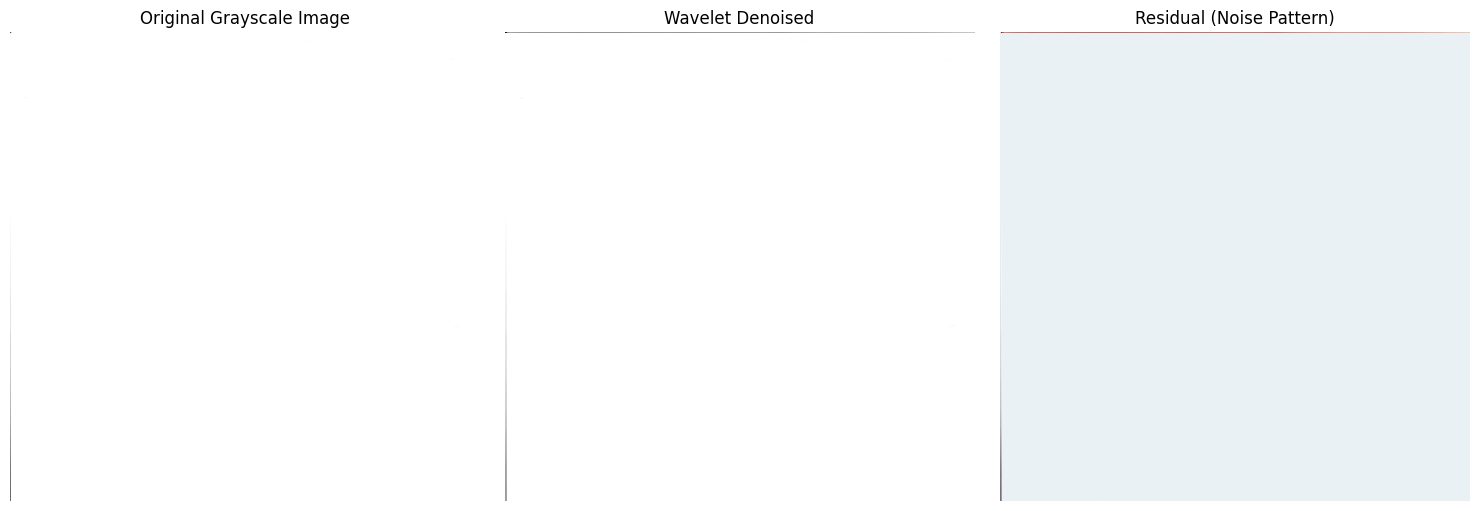

🧬 Extracted simple fingerprint feature (mean residual): 0.000000


In [8]:
# ==============================
# Simple 1-Image Denoising + Residual Extraction Demo
# ==============================
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

# ---------------------------
# CONFIG
# ---------------------------
IMG_PATH = r"D:\Scanner_Source_Identification\Flatfield\Canon120-2\150.tif"  # 👈 Change to your image path
IMG_SIZE = (512, 512)                    # Resize target

# ---------------------------
# Step 1: Load and preprocess
# ---------------------------
def preprocess_image(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        raise FileNotFoundError(f"Image not found: {path}")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray, IMG_SIZE, interpolation=cv2.INTER_AREA)
    gray = gray.astype(np.float32) / 255.0
    return gray

# ---------------------------
# Step 2: Wavelet denoising
# ---------------------------
def denoise_wavelet(img):
    coeffs = pywt.dwt2(img, 'haar')
    cA, (cH, cV, cD) = coeffs
    cH[:] = 0; cV[:] = 0; cD[:] = 0  # Zero out detail coeffs for denoising
    return pywt.idwt2((cA, (cH, cV, cD)), 'haar')

# ---------------------------
# Step 3: Residual computation (image - denoised)
# ---------------------------
def compute_residual(img):
    denoised = denoise_wavelet(img)
    residual = img - denoised
    return residual, denoised

# ---------------------------
# Step 4: Feature (Fingerprint) extraction — just visualize for one image
# ---------------------------
gray = preprocess_image(IMG_PATH)
residual, denoised = compute_residual(gray)

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(denoised, cmap='gray')
plt.title("Wavelet Denoised")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(residual, cmap='RdBu_r')
plt.title("Residual (Noise Pattern)")
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional fingerprint feature (mean residual intensity)
fingerprint_value = np.mean(residual)
print(f"🧬 Extracted simple fingerprint feature (mean residual): {fingerprint_value:.6f}")


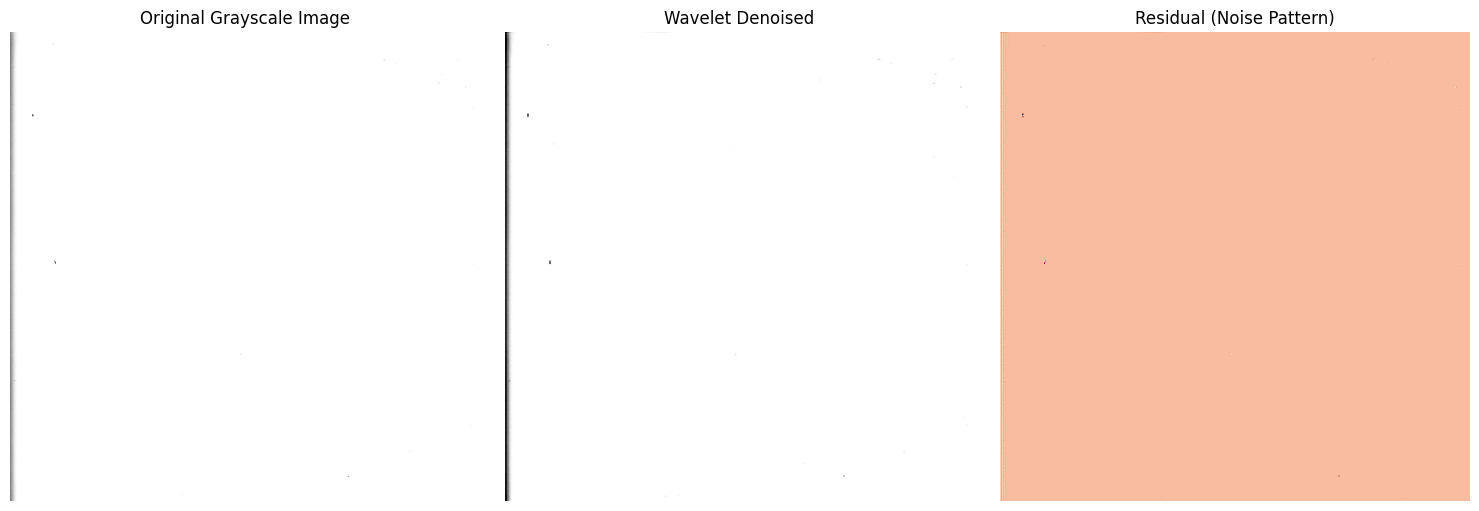

In [9]:
gray = preprocess_image(r"D:\Scanner_Source_Identification\Flatfield\EpsonV550\300.tif")
residual, denoised = compute_residual(gray)

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(denoised, cmap='gray')
plt.title("Wavelet Denoised")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(residual, cmap='RdBu_r')
plt.title("Residual (Noise Pattern)")
plt.axis('off')

plt.tight_layout()
plt.show()

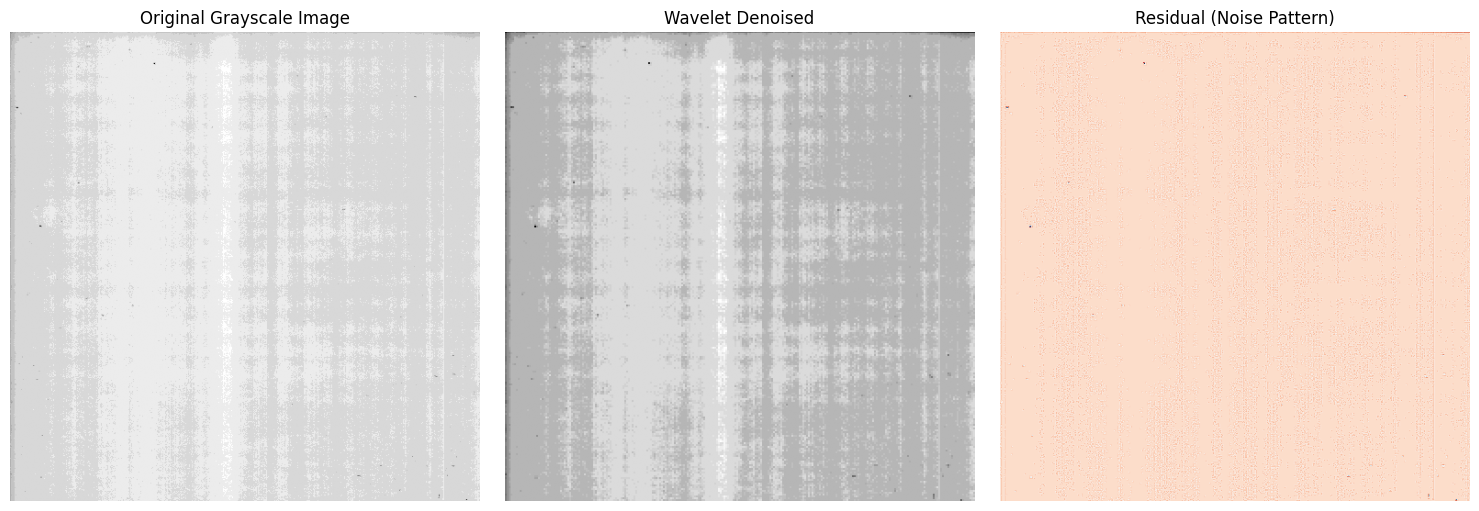

In [10]:
gray = preprocess_image(r"D:\Scanner_Source_Identification\Flatfield\HP\300.tif")
residual, denoised = compute_residual(gray)

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(denoised, cmap='gray')
plt.title("Wavelet Denoised")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(residual, cmap='RdBu_r')
plt.title("Residual (Noise Pattern)")
plt.axis('off')

plt.tight_layout()
plt.show()

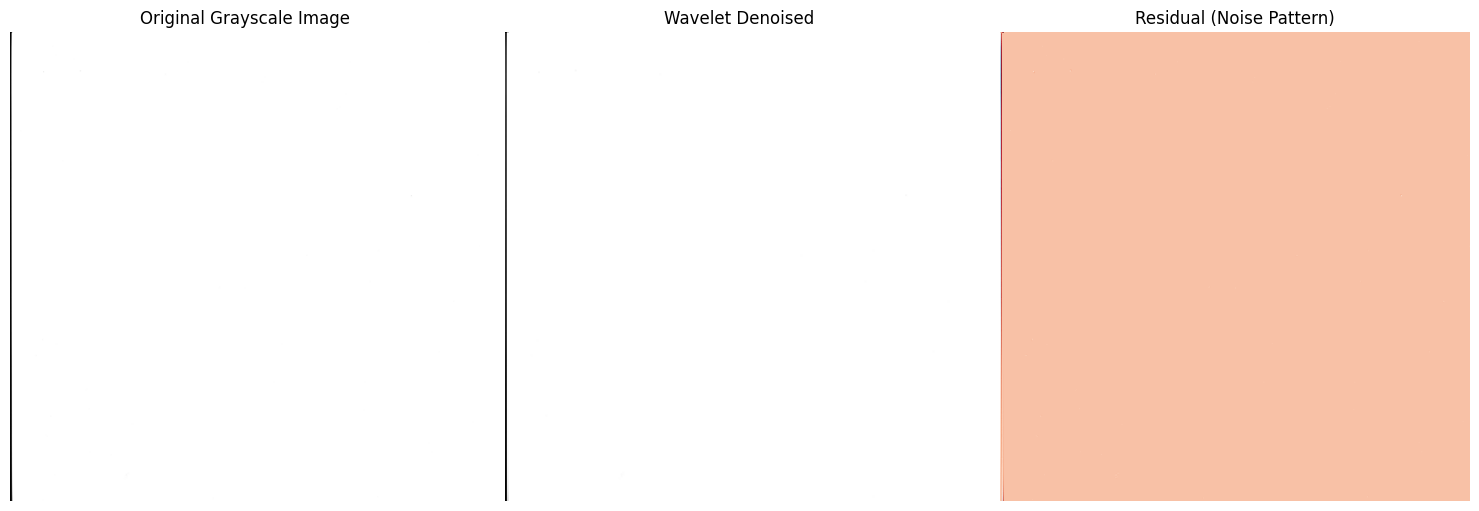

In [11]:
gray = preprocess_image(r"D:\Scanner_Source_Identification\Flatfield\Canon9000-1\300.tif")
residual, denoised = compute_residual(gray)

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(denoised, cmap='gray')
plt.title("Wavelet Denoised")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(residual, cmap='RdBu_r')
plt.title("Residual (Noise Pattern)")
plt.axis('off')

plt.tight_layout()
plt.show()

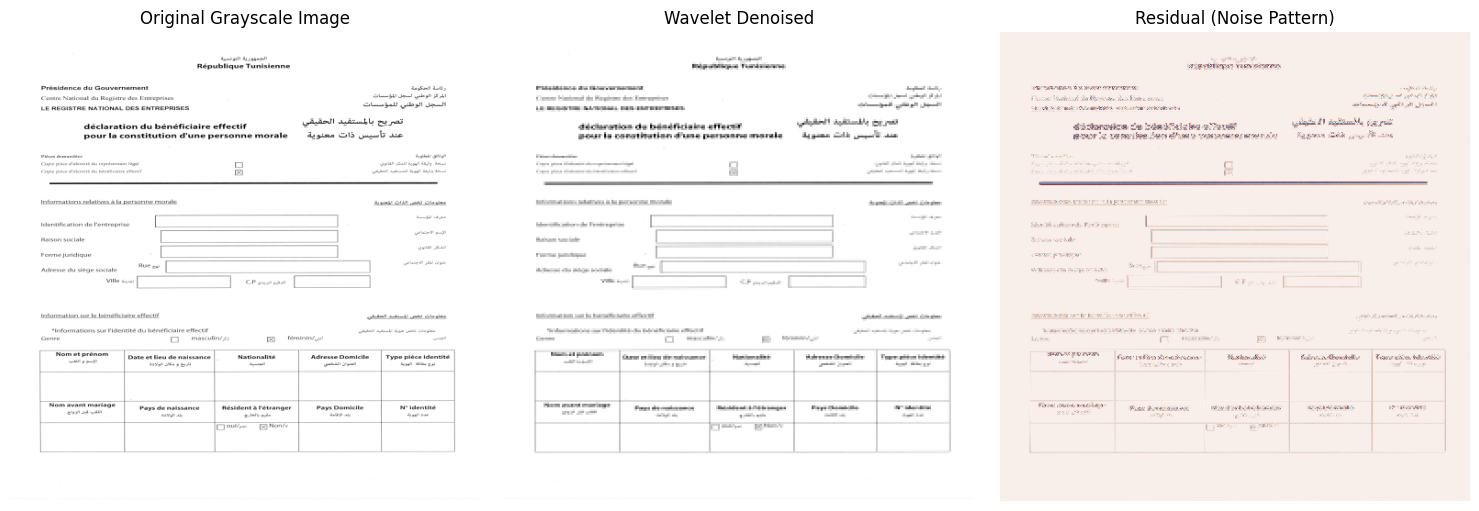

In [13]:
gray = preprocess_image(r"D:\Scanner_Source_Identification\Canon9000-2\150\s5_3.tif")
residual, denoised = compute_residual(gray)

# ---------------------------
# Step 5: Visualization
# ---------------------------
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(denoised, cmap='gray')
plt.title("Wavelet Denoised")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(residual, cmap='RdBu_r')
plt.title("Residual (Noise Pattern)")
plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
import pickle
import os

# Define output folder and filename
output_dir = r"D:\Flatfield-Processed"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "residual_only.pkl")

# Save the residual array directly as a pickle filw for cnn model
with open(output_path, "wb") as f:
    pickle.dump(residual.astype(np.float32), f)

print(f"✅ Residual saved to: {output_path}")

✅ Residual saved to: D:\Flatfield-Processed\residual_only.pkl
